In [341]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns
#print(df.shape)

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


#### Dataset  talleres
**ide_ope**: id operación
**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo  
**dispositivo**: dispositivo recopilación datos telemetria
**subarea**: agrupación de operaciones relacionadas
**fechaope**: fecha de la operación
**fecha_ent**: fecha entrada en taller

In [342]:
pd.options.display.max_rows=60


pd.options.display.max_columns=50


In [343]:
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_Nant_560_480.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_all_acc1.csv',sep=';')

df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_mix_560_480.csv',sep=';')
print(df.shape)
df

(12516, 33)


,id_ope,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fechaope,fecha_ent,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
0,71169,B116,13,ALEJANDRO,480 top,Aire acondicionado,Climatización,2016-09-09,2016-09-07,10,129,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
1,71170,B116,13,ALEJANDRO,480 top,Cambio o limpieza prefiltro gasoil,Gasoil,2016-09-09,2016-09-07,10,4905,355.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
2,71171,B116,13,ALEJANDRO,480 top,Compresor a.a,Climatización,2016-09-09,2016-09-07,10,235,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
3,71172,B116,13,ALEJANDRO,480 top,Valvulas a.a,Climatización,2016-09-09,2016-09-07,10,4905,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
4,72010,B116,13,GUILLERMO,480 top,Tapacubos,Ruedas,2016-09-29,2016-09-29,7,335,62.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,2091.02,890.40,NaN,NaN,NaN,0.0,0.0,2455.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,165626,H099,12,BERMEJO,480 top,Retrovisor derecho,Carrocería,2021-09-21,2021-09-21,13,55,55.0,52,MAN,CITTOUR,12.85,12310.0,10518.0,228.0,Urbano,Normal,76208.76,30849.32,0.0,0.0,NaN,0.0,0.0,55597.00,0.00,NaN,NaN,NaN
12512,165627,H132,2,NaN,480 top,Fallo en AVS,Fallo en AVS,2021-09-22,2021-09-21,6,671,NaN,29,MERCEDES BENZ,DYPARRO,8.79,4960.0,2987.0,140.0,Discrecional,Microbus,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
12513,165628,H109,14,ALEJANDRO,480 top,Aire acondicionado,Climatización,2021-09-21,2021-09-21,5,5,5.0,66,SCANIA,HABIT,10.58,10689.0,8867.0,169.0,Urbano,Midibus,177620.78,80422.08,0.0,0.0,NaN,0.0,0.0,202801.00,0.00,NaN,NaN,NaN
12514,165637,T340,3,NaN,560,Luces exteriores,Luces,2021-09-21,2021-09-21,21,1110,91.0,45,MAN,LION'S COACH L,13.90,15202.0,12419.0,338.0,Discrecional,Normal,126937.48,38326.00,16100.0,37149.0,5598.0,742821.0,742332.0,54426.36,104922.13,1371.36,31.375935,1.21


In [344]:
df.dtypes

id_ope                       int64
v_codigbus                  object
v_edad                       int64
aliasemp                    object
dispositivo                 object
nomopera                    object
subarea                     object
fechaope                    object
fecha_ent                   object
ndias_ant                    int64
ndias_ant_tipo               int64
ndias_ant_subarea          float64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                   float64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)    

In [345]:
df['fechaope'] = pd.to_datetime(df['fechaope'])
df['fecha_ent'] = pd.to_datetime(df['fecha_ent'])

In [346]:
len(df.columns)

33

In [347]:
df =df[df['dispositivo']=='560']

In [348]:
df.describe()

,id_ope,v_edad,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
count,2140.000000,2140.000000,2140.000000,2140.000000,1823.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2.140000e+03,2.140000e+03,2140.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,138879.785047,4.359813,22.241121,627.979907,232.880965,56.826636,13.380196,14715.386449,11354.852336,316.730374,78857.488869,27744.627402,8801.674299,18389.347196,1784.624299,5.509602e+05,5.510081e+05,27867.387257,45385.687030,2536.026106,27.354917,1444.178415
std,25453.365333,1.651631,50.370621,678.397296,292.262441,14.936998,1.598295,2663.716016,2042.169050,48.656429,66341.013240,59413.011039,11179.610806,18444.169209,5562.590977,5.122062e+05,5.131100e+05,29278.752771,54527.231157,5850.830474,15.774184,5150.290512
min,76024.000000,0.000000,-100.000000,-100.000000,1.000000,19.000000,7.740000,3900.000000,2987.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108002.250000,3.000000,5.000000,63.000000,34.000000,47.000000,12.920000,13785.000000,10837.000000,315.000000,26599.530000,7535.250000,1088.000000,2816.500000,0.000000,1.872240e+05,1.871965e+05,5440.875000,5948.900000,158.040000,22.480000,1.260000
50%,151808.500000,4.000000,12.000000,385.500000,117.000000,55.000000,13.130000,14119.000000,12419.000000,331.000000,65978.535000,19328.500000,5083.000000,12803.000000,207.000000,4.403180e+05,4.404500e+05,19855.525000,29037.420000,819.040000,29.311238,11.380000
75%,160380.250000,5.250000,26.000000,1024.000000,320.500000,71.000000,14.980000,17121.000000,12419.000000,353.000000,113153.177500,35614.000000,12149.000000,29951.500000,1198.500000,7.385578e+05,7.376222e+05,38718.472500,62612.900000,1919.410000,35.650723,265.770000
max,165640.000000,8.000000,724.000000,3072.000000,2000.000000,96.000000,14.980000,19050.000000,12777.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,168287.230000,415635.340000,36108.490000,98.294243,40038.900000


In [349]:
df.columns

Index(['id_ope', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fechaope', 'fecha_ent', 'ndias_ant', 'ndias_ant_tipo',
       'ndias_ant_subarea', 'capacidad', 'marca', 'modelo', 'longitud', 'tara',
       'cilindrada', 'potencia', 'tipo', 'subtipo', 'sum(c.`distancia`)',
       'sum(c.`litros_totales`)', 'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)',
       'sum(c.`exc_temp`)', 'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)',
       'sum(c.`min_ral`)', 'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)',
       'AVG(c.`inercia`)', 'sum(c.`kickdown`)'],
      dtype='object')

In [350]:
df = df.drop('id_ope', 1)
df = df.drop('fechaope', 1)
#df = df.drop('f_inicio', 1)
df = df.drop('ndias_ant', 1)
df = df.drop('ndias_ant_tipo', 1)
#df = df.drop('ndias_ant_subarea', 1)
len(df.columns)

C:\Users\Dani\AppData\Local\Temp/ipykernel_1724/894264480.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id_ope', 1)


29

In [351]:
df=df.sort_values(['fecha_ent','v_codigbus'])

df.head(50)
df = df.reset_index(drop=True)

In [352]:
df['fecha_ant']=(df.groupby(['v_codigbus'])['fecha_ent'].shift(1))#- df['fechaope']).shift(-1)
df['dias'] =  (df['fecha_ent'] - df['fecha_ant']).dt.days

df=df.sort_values(['v_codigbus','fecha_ent'])
df.reset_index(inplace=True)
df['match'] = df.v_codigbus.eq(df.v_codigbus.shift())

df['dias_ant'] = np.where(((df['dias']==0)&(df['match']==True)),df['dias'].replace(to_replace=0, method='ffill').values,df['dias'])
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant
0,1693,70HC,7,,560,INTERIOR VEHÍCULO,Interior,2021-05-21,377.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,344059.19,120930.0,14199.0,91506.0,333.0,2398484.0,2397135.0,161095.29,82538.69,1976.71,32.813388,2063.58,NaT,NaN,False,NaN
1,2078,70HC,7,,560,INTERIOR VEHÍCULO,Interior,2021-09-06,108.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,353893.40,124688.0,14980.0,95384.0,341.0,2458016.0,2456675.0,168287.23,88992.70,2076.64,31.938365,2099.85,2021-05-21,108.0,True,108.0
2,1364,75HC,5,NaN,560,LUCES INTERIORES,Interior,2021-02-12,1646.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,379470.96,106127.0,26191.0,54581.0,5176.0,2922087.0,2921402.0,154834.69,126251.24,4110.90,40.679167,1968.33,NaT,NaN,False,NaN
3,1688,75HC,5,,560,INTERIOR VEHÍCULO,Interior,2021-05-18,95.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,391581.41,109673.0,27733.0,57336.0,5347.0,3020424.0,3019739.0,160370.83,126251.24,4110.90,40.150119,2362.45,2021-02-12,95.0,True,95.0
4,1651,76HC,4,IVAN,560,INTERIOR VEHÍCULO,Interior,2021-05-06,67.0,59,MAN,i6 13.37,12.92,14112.0,12419.0,324.0,Discrecional,Normal,343432.53,112091.0,17369.0,76395.0,249.0,2342051.0,2340007.0,126868.90,51784.13,1516.38,34.766165,47.63,NaT,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2000,X118,5,JULIAN,560,Butaca chofer,Interior,2021-08-10,295.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,55059.81,17167.0,8067.0,2773.0,3733.0,757768.0,755961.0,141.43,75320.53,5941.49,30.798019,1123.77,2021-07-14,27.0,True,27.0
2136,2014,X118,5,CARABAÑA,560,Frenos 1º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-10,9.0,True,9.0
2137,2015,X118,5,CARABAÑA,560,Frenos 2º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-19,0.0,True,9.0
2138,2046,X118,5,JULIAN,560,Luna delantera,Lunas,2021-08-25,552.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.0,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-19,6.0,True,6.0


In [353]:
df['subarea_ant']=(df.groupby(['v_codigbus'])['subarea'].shift(1))


In [354]:
df.describe()

,index,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias,dias_ant
count,2140.000000,2140.000000,1823.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2.140000e+03,2.140000e+03,2140.000000,2057.000000,2057.000000,2057.000000,2057.000000,2070.000000,2042.000000
mean,1069.500000,4.359813,232.880965,56.826636,13.380196,14715.386449,11354.852336,316.730374,78857.488869,27744.627402,8801.674299,18389.347196,1784.624299,5.509602e+05,5.510081e+05,27867.387257,45385.687030,2536.026106,27.354917,1444.178415,20.800000,29.232615
std,617.909109,1.651631,292.262441,14.936998,1.598295,2663.716016,2042.169050,48.656429,66341.013240,59413.011039,11179.610806,18444.169209,5562.590977,5.122062e+05,5.131100e+05,29278.752771,54527.231157,5850.830474,15.774184,5150.290512,43.251483,47.430707
min,0.000000,0.000000,1.000000,19.000000,7.740000,3900.000000,2987.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,534.750000,3.000000,34.000000,47.000000,12.920000,13785.000000,10837.000000,315.000000,26599.530000,7535.250000,1088.000000,2816.500000,0.000000,1.872240e+05,1.871965e+05,5440.875000,5948.900000,158.040000,22.480000,1.260000,0.000000,6.000000
50%,1069.500000,4.000000,117.000000,55.000000,13.130000,14119.000000,12419.000000,331.000000,65978.535000,19328.500000,5083.000000,12803.000000,207.000000,4.403180e+05,4.404500e+05,19855.525000,29037.420000,819.040000,29.311238,11.380000,7.000000,14.000000
75%,1604.250000,5.250000,320.500000,71.000000,14.980000,17121.000000,12419.000000,353.000000,113153.177500,35614.000000,12149.000000,29951.500000,1198.500000,7.385578e+05,7.376222e+05,38718.472500,62612.900000,1919.410000,35.650723,265.770000,22.000000,32.750000
max,2139.000000,8.000000,2000.000000,96.000000,14.980000,19050.000000,12777.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,168287.230000,415635.340000,36108.490000,98.294243,40038.900000,721.000000,721.000000


In [355]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant
0,1693,70HC,7,,560,INTERIOR VEHÍCULO,Interior,2021-05-21,377.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,344059.19,120930.0,14199.0,91506.0,333.0,2398484.0,2397135.0,161095.29,82538.69,1976.71,32.813388,2063.58,NaT,NaN,False,NaN,NaN
1,2078,70HC,7,,560,INTERIOR VEHÍCULO,Interior,2021-09-06,108.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,353893.40,124688.0,14980.0,95384.0,341.0,2458016.0,2456675.0,168287.23,88992.70,2076.64,31.938365,2099.85,2021-05-21,108.0,True,108.0,Interior
2,1364,75HC,5,NaN,560,LUCES INTERIORES,Interior,2021-02-12,1646.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,379470.96,106127.0,26191.0,54581.0,5176.0,2922087.0,2921402.0,154834.69,126251.24,4110.90,40.679167,1968.33,NaT,NaN,False,NaN,NaN
3,1688,75HC,5,,560,INTERIOR VEHÍCULO,Interior,2021-05-18,95.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,391581.41,109673.0,27733.0,57336.0,5347.0,3020424.0,3019739.0,160370.83,126251.24,4110.90,40.150119,2362.45,2021-02-12,95.0,True,95.0,Interior
4,1651,76HC,4,IVAN,560,INTERIOR VEHÍCULO,Interior,2021-05-06,67.0,59,MAN,i6 13.37,12.92,14112.0,12419.0,324.0,Discrecional,Normal,343432.53,112091.0,17369.0,76395.0,249.0,2342051.0,2340007.0,126868.90,51784.13,1516.38,34.766165,47.63,NaT,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2000,X118,5,JULIAN,560,Butaca chofer,Interior,2021-08-10,295.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,55059.81,17167.0,8067.0,2773.0,3733.0,757768.0,755961.0,141.43,75320.53,5941.49,30.798019,1123.77,2021-07-14,27.0,True,27.0,Motor
2136,2014,X118,5,CARABAÑA,560,Frenos 1º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-10,9.0,True,9.0,Interior
2137,2015,X118,5,CARABAÑA,560,Frenos 2º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-19,0.0,True,9.0,Sistema de frenado
2138,2046,X118,5,JULIAN,560,Luna delantera,Lunas,2021-08-25,552.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.0,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-19,6.0,True,6.0,Sistema de frenado


In [356]:
to_show=['fecha_ant','fecha_ent','dias','dias_ant','ndias_ant_subarea','v_codigbus','subarea', 'subarea_ant','v_edad']
df[to_show].head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
0,NaT,2021-05-21,NaN,NaN,377.0,70HC,Interior,NaN,7
1,2021-05-21,2021-09-06,108.0,108.0,108.0,70HC,Interior,Interior,7
2,NaT,2021-02-12,NaN,NaN,1646.0,75HC,Interior,NaN,5
3,2021-02-12,2021-05-18,95.0,95.0,95.0,75HC,Interior,Interior,5
4,NaT,2021-05-06,NaN,NaN,67.0,76HC,Interior,NaN,4
5,2021-05-06,2021-09-07,124.0,124.0,124.0,76HC,Interior,Interior,4
6,2021-09-07,2021-09-07,0.0,124.0,NaN,76HC,Reglaje válvulas,Interior,4
7,NaT,2021-06-23,NaN,NaN,NaN,81HC,Luces,NaN,3
8,2021-06-23,2021-07-20,27.0,27.0,129.0,81HC,Lunas,Luces,3
9,NaT,2019-04-03,NaN,NaN,21.0,ACV0106,Lunas,NaN,3


In [357]:
#df['dias'] = df['dias'].astype(int)
df.dtypes

index                               int64
v_codigbus                         object
v_edad                              int64
aliasemp                           object
dispositivo                        object
nomopera                           object
subarea                            object
fecha_ent                  datetime64[ns]
ndias_ant_subarea                 float64
capacidad                           int64
marca                              object
modelo                             object
longitud                          float64
tara                              float64
cilindrada                        float64
potencia                          float64
tipo                               object
subtipo                            object
sum(c.`distancia`)                float64
sum(c.`litros_totales`)           float64
sum(c.`frenazos`)                 float64
sum(c.`exc_rpm`)                  float64
sum(c.`exc_temp`)                 float64
sum(c.`metros_asc`)               

In [358]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
609,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
610,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
611,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
612,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
613,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
614,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
615,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
616,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
617,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
618,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


In [359]:
df.loc[(df['ndias_ant_subarea']>3000), to_show].sort_values('fecha_ent')

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad


In [360]:
df.loc[(df.v_codigbus=='G084'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
588,NaT,2020-10-02,NaN,NaN,161.0,G084,Lunas,NaN,3
589,2020-10-02,2020-11-19,48.0,48.0,48.0,G084,Lunas,Lunas,3
590,2020-11-19,2021-03-17,118.0,118.0,NaN,G084,Motor,Lunas,4
591,2021-03-17,2021-03-17,0.0,118.0,519.0,G084,Adblue,Motor,4
592,2021-03-17,2021-03-31,14.0,14.0,14.0,G084,Adblue,Adblue,4
593,2021-03-31,2021-06-08,69.0,69.0,NaN,G084,Sistema de escape,Adblue,4
594,2021-06-08,2021-08-20,73.0,73.0,683.0,G084,Pinchazo,Sistema de escape,4


In [361]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
609,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
610,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
611,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
612,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
613,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
614,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
615,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
616,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
617,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
618,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


In [362]:
df['aliasemp'] = df['aliasemp'].fillna('Sin asignar')
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('IKAÑI')),'IÑAKI',df['aliasemp'])
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('               ')),'Sin asignar',df['aliasemp'])

In [363]:
df['dispositivo'] = np.where((df['dispositivo'].str.contains('480 top'))
                           ,'480',df['dispositivo'])

In [364]:
df['aliasemp_ant']=(df.groupby(['v_codigbus'])['aliasemp'].shift(1))

In [365]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,1693,70HC,7,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-05-21,377.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,344059.19,120930.0,14199.0,91506.0,333.0,2398484.0,2397135.0,161095.29,82538.69,1976.71,32.813388,2063.58,NaT,NaN,False,NaN,NaN,NaN
1,2078,70HC,7,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-09-06,108.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,353893.40,124688.0,14980.0,95384.0,341.0,2458016.0,2456675.0,168287.23,88992.70,2076.64,31.938365,2099.85,2021-05-21,108.0,True,108.0,Interior,Sin asignar
2,1364,75HC,5,Sin asignar,560,LUCES INTERIORES,Interior,2021-02-12,1646.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,379470.96,106127.0,26191.0,54581.0,5176.0,2922087.0,2921402.0,154834.69,126251.24,4110.90,40.679167,1968.33,NaT,NaN,False,NaN,NaN,NaN
3,1688,75HC,5,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-05-18,95.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,391581.41,109673.0,27733.0,57336.0,5347.0,3020424.0,3019739.0,160370.83,126251.24,4110.90,40.150119,2362.45,2021-02-12,95.0,True,95.0,Interior,Sin asignar
4,1651,76HC,4,IVAN,560,INTERIOR VEHÍCULO,Interior,2021-05-06,67.0,59,MAN,i6 13.37,12.92,14112.0,12419.0,324.0,Discrecional,Normal,343432.53,112091.0,17369.0,76395.0,249.0,2342051.0,2340007.0,126868.90,51784.13,1516.38,34.766165,47.63,NaT,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2000,X118,5,JULIAN,560,Butaca chofer,Interior,2021-08-10,295.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,55059.81,17167.0,8067.0,2773.0,3733.0,757768.0,755961.0,141.43,75320.53,5941.49,30.798019,1123.77,2021-07-14,27.0,True,27.0,Motor,BERMEJO
2136,2014,X118,5,CARABAÑA,560,Frenos 1º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-10,9.0,True,9.0,Interior,JULIAN
2137,2015,X118,5,CARABAÑA,560,Frenos 2º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-19,0.0,True,9.0,Sistema de frenado,CARABAÑA
2138,2046,X118,5,JULIAN,560,Luna delantera,Lunas,2021-08-25,552.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.0,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-19,6.0,True,6.0,Sistema de frenado,CARABAÑA


In [366]:
df['dispositivo'].value_counts()

560    2140
Name: dispositivo, dtype: int64

In [367]:
df['subarea'].value_counts()

Motor                       267
Interior                    203
Climatización               173
Ruedas                      166
Puertas                     161
Lunas                       147
Carrocería                  142
Sistema eléctrico           138
Luces                       102
Sistema de frenado           92
Sistema de refrigeración     80
Filtro de Partículas         53
Pinchazo                     52
Fuelle                       50
Sistema de dirección         44
Bateria                      40
Adblue                       37
Correas                      32
Alternador                   28
Gasoil                       26
Fuga de aire                 21
Sistema de transmisión       19
Sistema de amortiguación     16
ABS/EBS                      13
Fallo en AVS                 10
Precalentador                 9
Sistema de escape             7
Sistema de alimentación       7
Reglaje válvulas              5
Name: subarea, dtype: int64

Observaciones: 2140
Atributos: 36


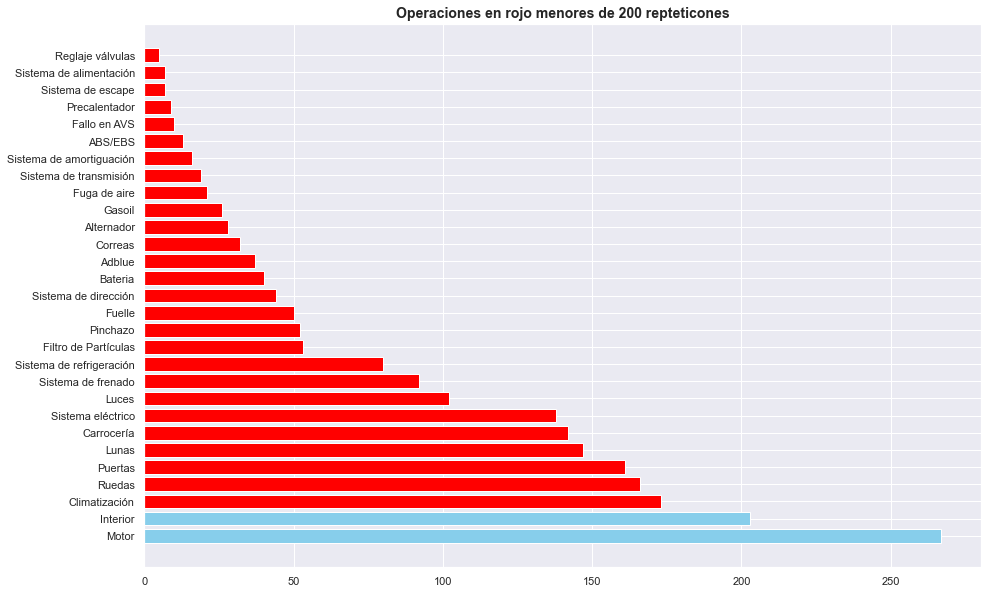

In [368]:
plt.figure(figsize=(15,10))
limite=200

x=df['subarea'].value_counts().index
y=df['subarea'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Operaciones en rojo menores de %d repteticones" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

print('Observaciones: '+str(df.shape[0])+'\n'+ 'Atributos: '+str(df.shape[1]))


In [369]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,1693,70HC,7,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-05-21,377.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,344059.19,120930.0,14199.0,91506.0,333.0,2398484.0,2397135.0,161095.29,82538.69,1976.71,32.813388,2063.58,NaT,NaN,False,NaN,NaN,NaN
1,2078,70HC,7,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-09-06,108.0,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,353893.40,124688.0,14980.0,95384.0,341.0,2458016.0,2456675.0,168287.23,88992.70,2076.64,31.938365,2099.85,2021-05-21,108.0,True,108.0,Interior,Sin asignar
2,1364,75HC,5,Sin asignar,560,LUCES INTERIORES,Interior,2021-02-12,1646.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,379470.96,106127.0,26191.0,54581.0,5176.0,2922087.0,2921402.0,154834.69,126251.24,4110.90,40.679167,1968.33,NaT,NaN,False,NaN,NaN,NaN
3,1688,75HC,5,Sin asignar,560,INTERIOR VEHÍCULO,Interior,2021-05-18,95.0,55,SCANIA,i6 13.37,12.92,14142.0,12742.0,331.0,Discrecional,Normal,391581.41,109673.0,27733.0,57336.0,5347.0,3020424.0,3019739.0,160370.83,126251.24,4110.90,40.150119,2362.45,2021-02-12,95.0,True,95.0,Interior,Sin asignar
4,1651,76HC,4,IVAN,560,INTERIOR VEHÍCULO,Interior,2021-05-06,67.0,59,MAN,i6 13.37,12.92,14112.0,12419.0,324.0,Discrecional,Normal,343432.53,112091.0,17369.0,76395.0,249.0,2342051.0,2340007.0,126868.90,51784.13,1516.38,34.766165,47.63,NaT,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2000,X118,5,JULIAN,560,Butaca chofer,Interior,2021-08-10,295.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,55059.81,17167.0,8067.0,2773.0,3733.0,757768.0,755961.0,141.43,75320.53,5941.49,30.798019,1123.77,2021-07-14,27.0,True,27.0,Motor,BERMEJO
2136,2014,X118,5,CARABAÑA,560,Frenos 1º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-10,9.0,True,9.0,Interior,JULIAN
2137,2015,X118,5,CARABAÑA,560,Frenos 2º eje,Sistema de frenado,2021-08-19,275.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,57170.43,17784.0,8259.0,2804.0,3782.0,784262.0,782677.0,144.10,80955.56,6078.52,30.317674,1197.57,2021-08-19,0.0,True,9.0,Sistema de frenado,CARABAÑA
2138,2046,X118,5,JULIAN,560,Luna delantera,Lunas,2021-08-25,552.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.0,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,2021-08-19,6.0,True,6.0,Sistema de frenado,CARABAÑA


In [370]:
df.columns

Index(['index', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fecha_ent', 'ndias_ant_subarea', 'capacidad', 'marca',
       'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'fecha_ant', 'dias', 'match', 'dias_ant',
       'subarea_ant', 'aliasemp_ant'],
      dtype='object')

In [371]:
df =df[df['dispositivo']=='560']


In [372]:
df.describe()

,index,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias,dias_ant
count,2140.000000,2140.000000,1823.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2.140000e+03,2.140000e+03,2140.000000,2057.000000,2057.000000,2057.000000,2057.000000,2070.000000,2042.000000
mean,1069.500000,4.359813,232.880965,56.826636,13.380196,14715.386449,11354.852336,316.730374,78857.488869,27744.627402,8801.674299,18389.347196,1784.624299,5.509602e+05,5.510081e+05,27867.387257,45385.687030,2536.026106,27.354917,1444.178415,20.800000,29.232615
std,617.909109,1.651631,292.262441,14.936998,1.598295,2663.716016,2042.169050,48.656429,66341.013240,59413.011039,11179.610806,18444.169209,5562.590977,5.122062e+05,5.131100e+05,29278.752771,54527.231157,5850.830474,15.774184,5150.290512,43.251483,47.430707
min,0.000000,0.000000,1.000000,19.000000,7.740000,3900.000000,2987.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,534.750000,3.000000,34.000000,47.000000,12.920000,13785.000000,10837.000000,315.000000,26599.530000,7535.250000,1088.000000,2816.500000,0.000000,1.872240e+05,1.871965e+05,5440.875000,5948.900000,158.040000,22.480000,1.260000,0.000000,6.000000
50%,1069.500000,4.000000,117.000000,55.000000,13.130000,14119.000000,12419.000000,331.000000,65978.535000,19328.500000,5083.000000,12803.000000,207.000000,4.403180e+05,4.404500e+05,19855.525000,29037.420000,819.040000,29.311238,11.380000,7.000000,14.000000
75%,1604.250000,5.250000,320.500000,71.000000,14.980000,17121.000000,12419.000000,353.000000,113153.177500,35614.000000,12149.000000,29951.500000,1198.500000,7.385578e+05,7.376222e+05,38718.472500,62612.900000,1919.410000,35.650723,265.770000,22.000000,32.750000
max,2139.000000,8.000000,2000.000000,96.000000,14.980000,19050.000000,12777.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,168287.230000,415635.340000,36108.490000,98.294243,40038.900000,721.000000,721.000000


In [373]:


features=['v_codigbus', 'v_edad', 'dispositivo',
       'ndias_ant_subarea', 'capacidad', 'marca',
       'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'match', 'dias_ant',
       'subarea_ant', 'aliasemp_ant']

df=df[features]

In [374]:

for f in features:
    df=df.drop(df[df[f]==0].index)
    

In [375]:
round(df.isna().sum() * 100 / len(df),2)

v_codigbus                  0.00
v_edad                      0.00
dispositivo                 0.00
ndias_ant_subarea          11.67
capacidad                   0.00
marca                       0.00
modelo                      0.00
longitud                    0.00
tara                        0.00
cilindrada                  0.00
potencia                    0.00
tipo                        0.00
subtipo                     0.00
sum(c.`distancia`)          0.00
sum(c.`litros_totales`)     0.00
sum(c.`frenazos`)           0.00
sum(c.`exc_rpm`)            0.00
sum(c.`exc_temp`)           0.00
sum(c.`metros_asc`)         0.00
sum(c.`metros_desc`)        0.00
sum(c.`min_ral`)            0.00
sum(c.`acel_bruscas`)       1.83
sum(c.`decel_bruscas`)      1.83
AVG(c.`inercia`)            1.83
sum(c.`kickdown`)           1.83
match                       0.00
dias_ant                    0.15
subarea_ant                 0.00
aliasemp_ant                0.00
dtype: float64

In [376]:
df=df.dropna()
df.reset_index(drop = True, inplace = True)

print('Columnas: '+str(df.shape[0])+'\nFilas: '+str(df.shape[1]))

Columnas: 1134
Filas: 29


to_show=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','fecha_ent']
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

In [377]:
df.describe()


,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias_ant
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1.134000e+03,1.134000e+03,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,4.602293,227.339506,54.898589,13.371376,14966.781305,11413.325397,320.647266,92560.469189,29800.358501,9796.283069,23128.283069,2455.979718,6.258782e+05,6.258096e+05,31518.160511,55338.269859,2528.272293,30.907424,2088.728616,27.026455
std,1.617871,278.628339,14.229903,1.577644,2507.375707,1989.163069,44.666035,63592.251121,21360.297551,10275.452288,19055.141064,7022.312464,4.914052e+05,4.921009e+05,29593.092327,51772.696655,5361.174855,7.559708,6316.716316,40.902692
min,1.000000,1.000000,19.000000,7.740000,3900.000000,2987.000000,140.000000,1023.070000,293.000000,62.000000,86.000000,3.000000,5.234000e+03,5.252000e+03,0.250000,440.010000,13.990000,1.349528,0.030000,1.000000
25%,3.000000,34.000000,45.000000,12.920000,14112.000000,10837.000000,320.000000,46421.170000,14282.250000,3081.000000,6141.250000,119.250000,2.949952e+05,2.945940e+05,8695.417500,20706.850000,535.907500,26.638687,8.300000,6.000000
50%,5.000000,118.000000,55.000000,13.090000,14142.000000,12419.000000,324.000000,86351.185000,27308.500000,5948.500000,20130.000000,422.500000,5.493390e+05,5.460375e+05,26117.875000,41376.840000,1165.110000,31.440024,37.905000,13.000000
75%,6.000000,320.750000,67.000000,14.980000,17121.000000,12419.000000,353.000000,127430.670000,41858.000000,13389.000000,34461.750000,1741.000000,8.028400e+05,8.017875e+05,42376.067500,68149.910000,1970.400000,34.754258,532.670000,30.000000
max,8.000000,2000.000000,96.000000,14.980000,19050.000000,12777.000000,360.000000,391581.410000,124693.000000,50455.000000,95384.000000,54247.000000,3.020424e+06,3.019739e+06,168287.230000,292629.500000,34756.200000,55.420667,40038.900000,327.000000


In [378]:
df['dias_ant'] = df['dias_ant'].astype(np.int64)
df['capacidad'] = df['capacidad'].astype(np.int64)
df['potencia'] = df['potencia'].astype(np.int64)
df['ndias_ant_subarea'] = df['ndias_ant_subarea'].astype(np.int64)
df.dtypes



v_codigbus                  object
v_edad                       int64
dispositivo                 object
ndias_ant_subarea            int64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                     int64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)           float64
sum(c.`acel_bruscas`)      float64
sum(c.`decel_bruscas`)     float64
AVG(c.`inercia`)           float64
sum(c.`kickdown`)          float64
match                         bool
dias_ant                     int64
subarea_ant                 object
aliasemp_ant        

In [379]:
df['aliasemp_ant'].value_counts().index

Index(['Sin asignar', 'DEL REY', 'RODRIGUEZ', 'BERMEJO', 'CARABAÑA', 'MIÑANA',
       'ALEJANDRO', 'CESAR GOMEZ', 'RICARDO', 'GUILLERMO', 'SERAFIN',
       'FERNANDO', 'LLORENTE', 'ESTEVE', 'FONT', 'JULIAN', 'ALFONSO', 'JAVI',
       'RUFFINO', 'JUAN ANTONIO', 'ESCRIBANO', 'DAVID', 'GALVEZ', 'LAZARO',
       'FELIX', 'IVAN', 'IÑAKI'],
      dtype='object')

In [380]:
df['aliasemp_ant'].value_counts()

Sin asignar     310
DEL REY         109
RODRIGUEZ       105
BERMEJO          97
CARABAÑA         82
MIÑANA           67
ALEJANDRO        61
CESAR GOMEZ      48
RICARDO          40
GUILLERMO        34
SERAFIN          34
FERNANDO         29
LLORENTE         24
ESTEVE           20
FONT             17
JULIAN           15
ALFONSO          13
JAVI              5
RUFFINO           4
JUAN ANTONIO      4
ESCRIBANO         4
DAVID             4
GALVEZ            2
LAZARO            2
FELIX             2
IVAN              1
IÑAKI             1
Name: aliasemp_ant, dtype: int64

<BarContainer object of 27 artists>

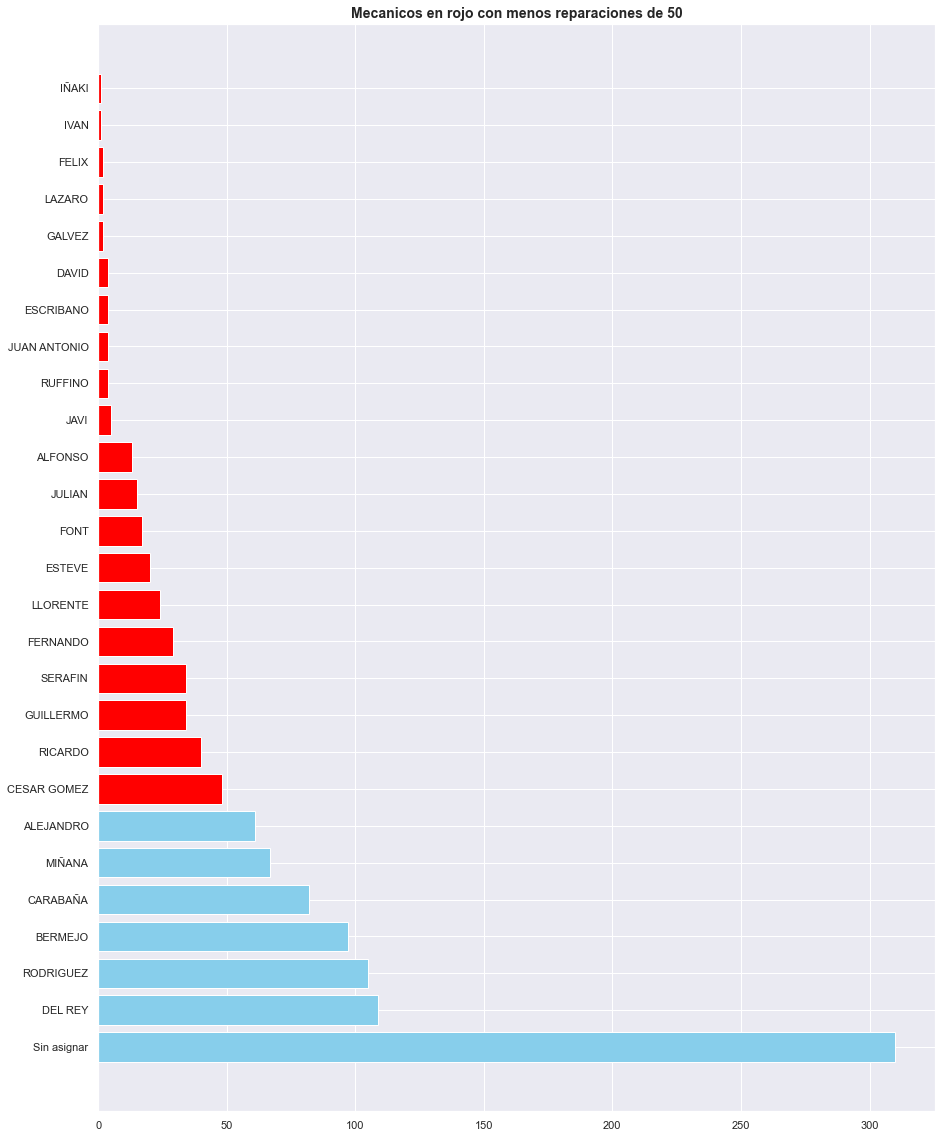

In [381]:
plt.figure(figsize=(15,20))
limite=50

x=df['aliasemp_ant'].value_counts().index
y=df['aliasemp_ant'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [382]:
df.columns

Index(['v_codigbus', 'v_edad', 'dispositivo', 'ndias_ant_subarea', 'capacidad',
       'marca', 'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'match', 'dias_ant', 'subarea_ant',
       'aliasemp_ant'],
      dtype='object')

In [383]:
df.dtypes

v_codigbus                  object
v_edad                       int64
dispositivo                 object
ndias_ant_subarea            int64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                     int64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)           float64
sum(c.`acel_bruscas`)      float64
sum(c.`decel_bruscas`)     float64
AVG(c.`inercia`)           float64
sum(c.`kickdown`)          float64
match                         bool
dias_ant                     int64
subarea_ant                 object
aliasemp_ant        

In [384]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['v_codigbus','dispositivo','aliasemp_ant','subarea_ant', 'marca','modelo','tipo','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,v_codigbus,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,aliasemp_ant
0,1,1,1,1,1,1,1,1
1,2,1,2,2,1,1,1,1
2,3,1,1,2,1,1,1,2
3,4,1,1,1,1,1,2,3
4,4,1,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...
1129,42,1,3,3,1,2,4,8
1130,42,1,3,3,1,2,1,13
1131,42,1,3,3,1,2,13,9
1132,42,1,3,3,1,2,13,9


In [385]:
df.columns

Index(['v_codigbus', 'v_edad', 'dispositivo', 'ndias_ant_subarea', 'capacidad',
       'marca', 'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'match', 'dias_ant', 'subarea_ant',
       'aliasemp_ant'],
      dtype='object')

In [386]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.drop(columns=['dias_ant','ndias_ant_subarea']).columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num.drop(columns=['dias_ant','ndias_ant_subarea']))
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df[['dias_ant','ndias_ant_subarea']]=df_num[['dias_ant','ndias_ant_subarea']]

df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df['target']=df_num['ndias_ant']

In [387]:
df_num.head(50)

,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias_ant
0,7,108,71,14.98,17121.0,12419.0,353,353893.40,124688.0,14980.0,95384.0,341.0,2458016.0,2456675.0,168287.23,88992.70,2076.64,31.938365,2099.85,108
1,5,95,55,12.92,14142.0,12742.0,331,391581.41,109673.0,27733.0,57336.0,5347.0,3020424.0,3019739.0,160370.83,126251.24,4110.90,40.150119,2362.45,95
2,4,124,59,12.92,14112.0,12419.0,324,359053.63,117955.0,18543.0,80895.0,260.0,2438270.0,2436277.0,129977.86,58329.71,1636.27,34.897874,145.07,124
3,5,25,71,14.98,17121.0,12419.0,353,8456.92,2948.0,853.0,2537.0,88.0,61677.0,61635.0,2498.15,4032.87,136.59,41.141739,0.13,25
4,5,310,71,14.98,17121.0,12419.0,353,18343.07,6313.0,1676.0,4831.0,161.0,140615.0,140570.0,5010.57,8113.00,165.59,37.512444,0.25,28
5,5,305,71,14.98,17121.0,12419.0,353,20898.21,7193.0,1928.0,5515.0,175.0,161366.0,161325.0,5728.79,9291.97,165.59,38.396923,0.25,10
6,5,320,71,14.98,17121.0,12419.0,353,22485.61,7733.0,2084.0,5946.0,184.0,173712.0,174257.0,6149.18,9994.94,205.59,38.149825,0.33,7
7,6,456,71,14.98,17121.0,12419.0,353,33288.89,11432.0,3322.0,9080.0,252.0,261338.0,261321.0,8541.15,15432.03,411.67,38.478118,0.39,3
8,6,70,71,14.98,17121.0,12419.0,353,35667.97,12241.0,3517.0,9779.0,275.0,280769.0,280755.0,9155.44,16624.50,461.85,38.671868,0.39,10
9,6,546,71,14.98,17121.0,12419.0,353,38987.37,13366.0,3788.0,10691.0,302.0,308435.0,308443.0,9883.69,18131.35,550.34,39.131313,0.39,10


In [388]:
scaled_df

,v_edad,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias_ant,ndias_ant_subarea
0,1.482668,1.132019,1.020087,0.859532,0.505800,0.724645,4.111322,4.444203,0.504698,3.793601,-0.301313,3.730009,3.722149,4.623694,0.650329,-0.084278,0.136433,0.001761,108,108
1,0.245930,0.007130,-0.286234,-0.329087,0.668251,0.231883,4.704235,3.740954,1.746359,1.795988,0.411872,4.875004,4.866858,4.356068,1.370303,0.295332,1.223165,0.043352,95,95
2,-0.372439,0.288352,-0.286234,-0.341057,0.505800,0.075095,4.192504,4.128853,0.851600,3.032893,-0.312853,3.689809,3.680680,3.328586,0.057806,-0.166455,0.528091,-0.307837,124,124
3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.323128,-1.257670,-0.870738,-1.081092,-0.337357,-1.148645,-1.146967,-0.981067,-0.991411,-0.446308,1.354395,-0.330792,25,25
4,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.167597,-1.100065,-0.790609,-0.960652,-0.326957,-0.987937,-0.986492,-0.896131,-0.912568,-0.440897,0.874099,-0.330773,28,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.589965,-0.591702,-0.168367,-1.068702,0.181932,0.268512,0.264598,-1.060740,0.386132,0.636936,-0.014479,-0.152830,27,295
1130,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1131,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1132,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.535744,-0.545147,-0.142371,-1.066497,0.190053,0.360273,0.356664,-1.060405,0.561959,0.693297,-0.099099,-0.141142,6,552


In [389]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(1134, 28)

In [390]:
df_norm

,v_codigbus,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,aliasemp_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias_ant,ndias_ant_subarea
0,1,1,1,1,1,1,1,1,1.482668,1.132019,1.020087,0.859532,0.505800,0.724645,4.111322,4.444203,0.504698,3.793601,-0.301313,3.730009,3.722149,4.623694,0.650329,-0.084278,0.136433,0.001761,108,108
1,2,1,2,2,1,1,1,1,0.245930,0.007130,-0.286234,-0.329087,0.668251,0.231883,4.704235,3.740954,1.746359,1.795988,0.411872,4.875004,4.866858,4.356068,1.370303,0.295332,1.223165,0.043352,95,95
2,3,1,1,2,1,1,1,2,-0.372439,0.288352,-0.286234,-0.341057,0.505800,0.075095,4.192504,4.128853,0.851600,3.032893,-0.312853,3.689809,3.680680,3.328586,0.057806,-0.166455,0.528091,-0.307837,124,124
3,4,1,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.323128,-1.257670,-0.870738,-1.081092,-0.337357,-1.148645,-1.146967,-0.981067,-0.991411,-0.446308,1.354395,-0.330792,25,25
4,4,1,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.167597,-1.100065,-0.790609,-0.960652,-0.326957,-0.987937,-0.986492,-0.896131,-0.912568,-0.440897,0.874099,-0.330773,28,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,42,1,3,3,1,2,4,8,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.589965,-0.591702,-0.168367,-1.068702,0.181932,0.268512,0.264598,-1.060740,0.386132,0.636936,-0.014479,-0.152830,27,295
1130,42,1,3,3,1,2,1,13,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1131,42,1,3,3,1,2,13,9,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1132,42,1,3,3,1,2,13,9,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.535744,-0.545147,-0.142371,-1.066497,0.190053,0.360273,0.356664,-1.060405,0.561959,0.693297,-0.099099,-0.141142,6,552


(array([0]), [Text(0, 0, '0')])

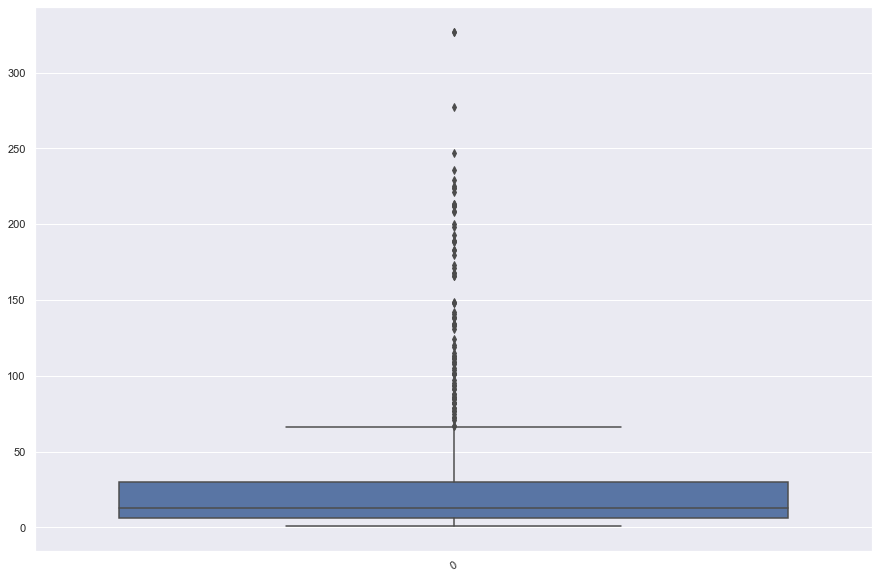

In [391]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df['dias_ant'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'v_codigbus'),
  Text(1, 0, 'dispositivo'),
  Text(2, 0, 'marca'),
  Text(3, 0, 'modelo'),
  Text(4, 0, 'tipo'),
  Text(5, 0, 'subtipo'),
  Text(6, 0, 'subarea_ant'),
  Text(7, 0, 'aliasemp_ant')])

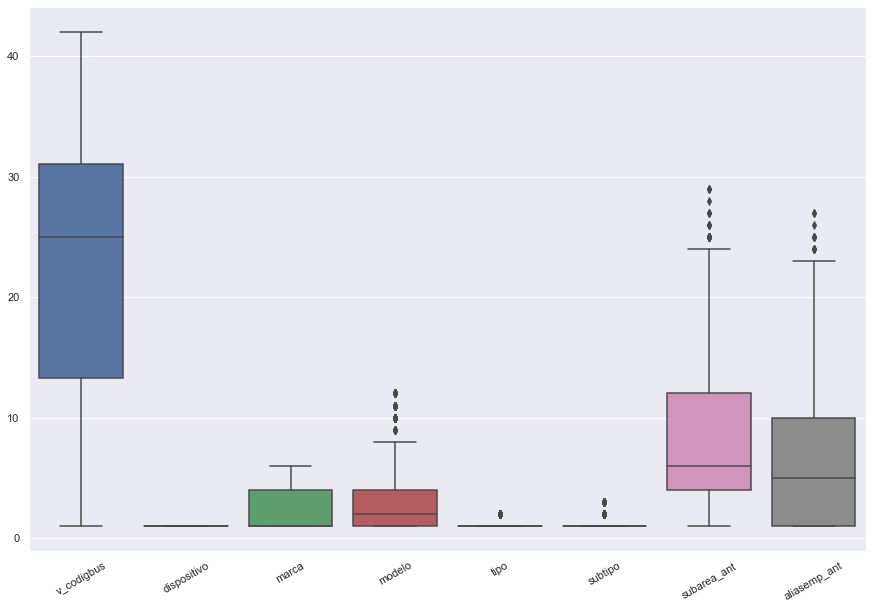

In [392]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df_enc)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'v_edad'),
  Text(1, 0, 'capacidad'),
  Text(2, 0, 'longitud'),
  Text(3, 0, 'tara'),
  Text(4, 0, 'cilindrada'),
  Text(5, 0, 'potencia'),
  Text(6, 0, 'sum(c.`distancia`)'),
  Text(7, 0, 'sum(c.`litros_totales`)'),
  Text(8, 0, 'sum(c.`frenazos`)'),
  Text(9, 0, 'sum(c.`exc_rpm`)'),
  Text(10, 0, 'sum(c.`exc_temp`)'),
  Text(11, 0, 'sum(c.`metros_asc`)'),
  Text(12, 0, 'sum(c.`metros_desc`)'),
  Text(13, 0, 'sum(c.`min_ral`)'),
  Text(14, 0, 'sum(c.`acel_bruscas`)'),
  Text(15, 0, 'sum(c.`decel_bruscas`)'),
  Text(16, 0, 'AVG(c.`inercia`)'),
  Text(17, 0, 'sum(c.`kickdown`)')])

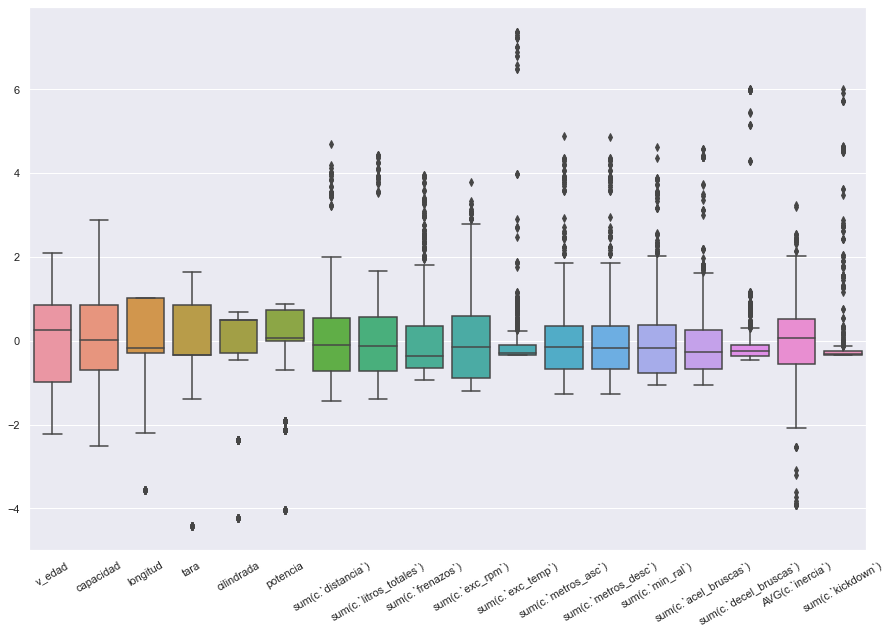

In [393]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=scaled_df.drop(columns=['dias_ant','ndias_ant_subarea']))
plt.xticks(rotation=30)

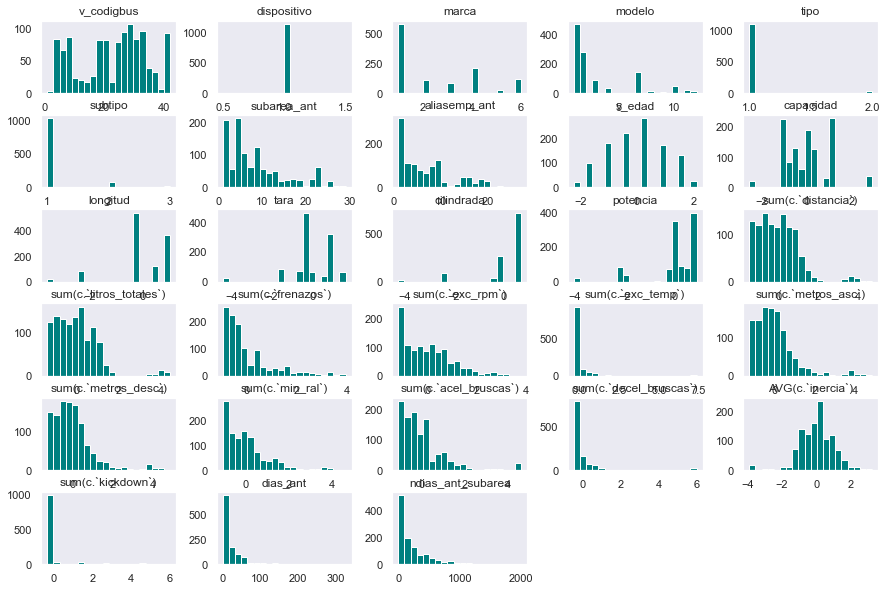

In [394]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

In [395]:
df_subarea_ant = pd.DataFrame({'subarea_ant':pd.unique(df.subarea_ant), 'codigo':pd.unique(df_norm.subarea_ant)})

df_subarea_ant

,subarea_ant,codigo
0,Interior,1
1,Puertas,2
2,Lunas,3
3,Motor,4
4,Sistema eléctrico,5
5,Climatización,6
6,Carrocería,7
7,Ruedas,8
8,Filtro de Partículas,9
9,Luces,10


In [396]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,70HC,1
1,75HC,2
2,76HC,3
3,B156,4
4,B164,5
5,B165,6
6,B166,7
7,B168,8
8,B170,9
9,B176,10


In [397]:

df_aliasemp_ant = pd.DataFrame({'aliasemp_ant':pd.unique(df.aliasemp_ant), 'codigo':pd.unique(df_norm.aliasemp_ant)})
df_aliasemp_ant

,aliasemp_ant,codigo
0,Sin asignar,1
1,IVAN,2
2,DEL REY,3
3,RODRIGUEZ,4
4,ALEJANDRO,5
5,FONT,6
6,MIÑANA,7
7,BERMEJO,8
8,CARABAÑA,9
9,RICARDO,10


In [398]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,MAN,1
1,SCANIA,2
2,CUMMINS,3
3,DAF,4
4,MERCEDES BENZ,5
5,VOLVO,6


In [399]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,i6 15.37,1
1,i6 13.37,2
2,C10,3
3,LION'S REGIO L,4
4,TOURISMO RHD,5
5,LION'S COACH,6
6,SC7,7
7,i6 13.38,8
8,LION'S COACH C,9
9,I6 13.35,10


In [400]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Discrecional,1
1,Interurbano,2


In [401]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1
1,Midibus,2
2,Microbus,3


In [402]:
df['subtipo'].value_counts()

Normal      1025
Midibus       87
Microbus      22
Name: subtipo, dtype: int64

<BarContainer object of 3 artists>

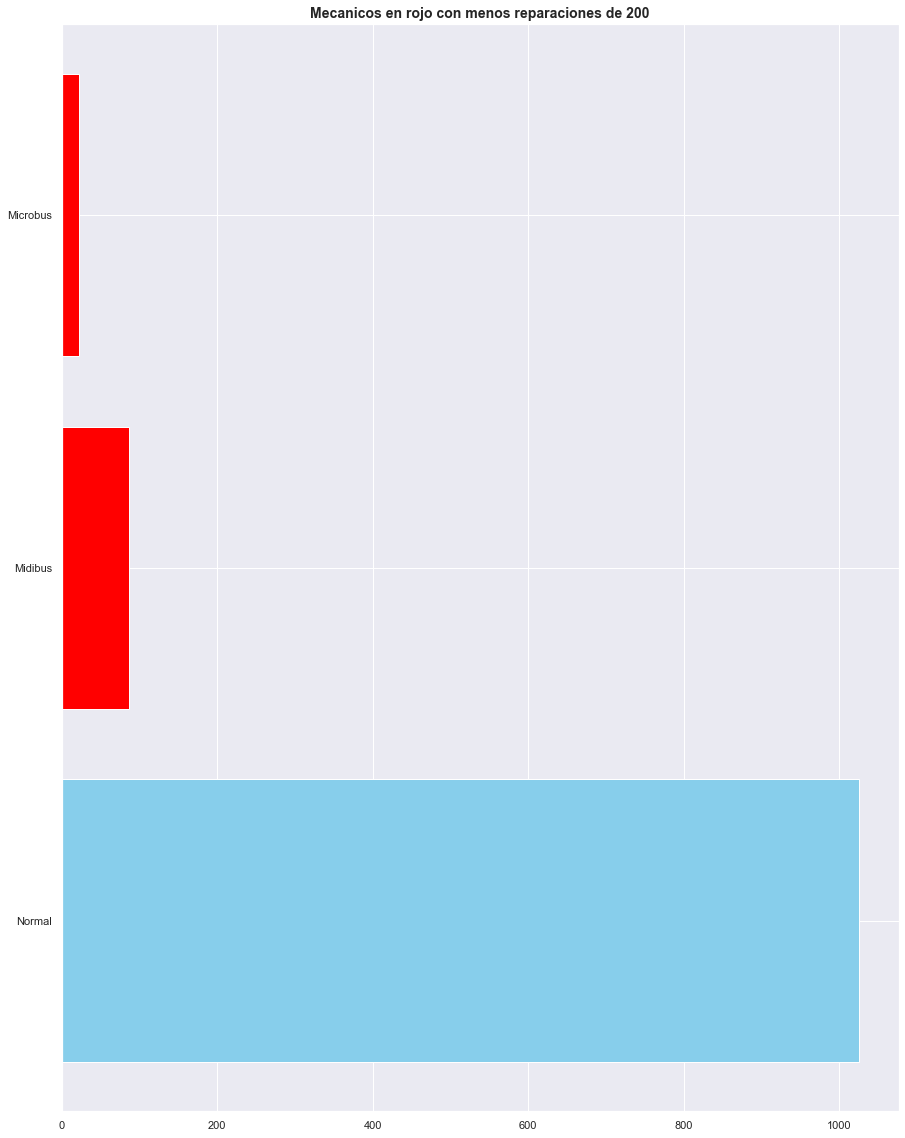

In [403]:
plt.figure(figsize=(15,20))
limite=200

x=df['subtipo'].value_counts().index
y=df['subtipo'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

In [404]:
df_norm=df_norm.drop(['dispositivo'],axis=1)

<AxesSubplot:>

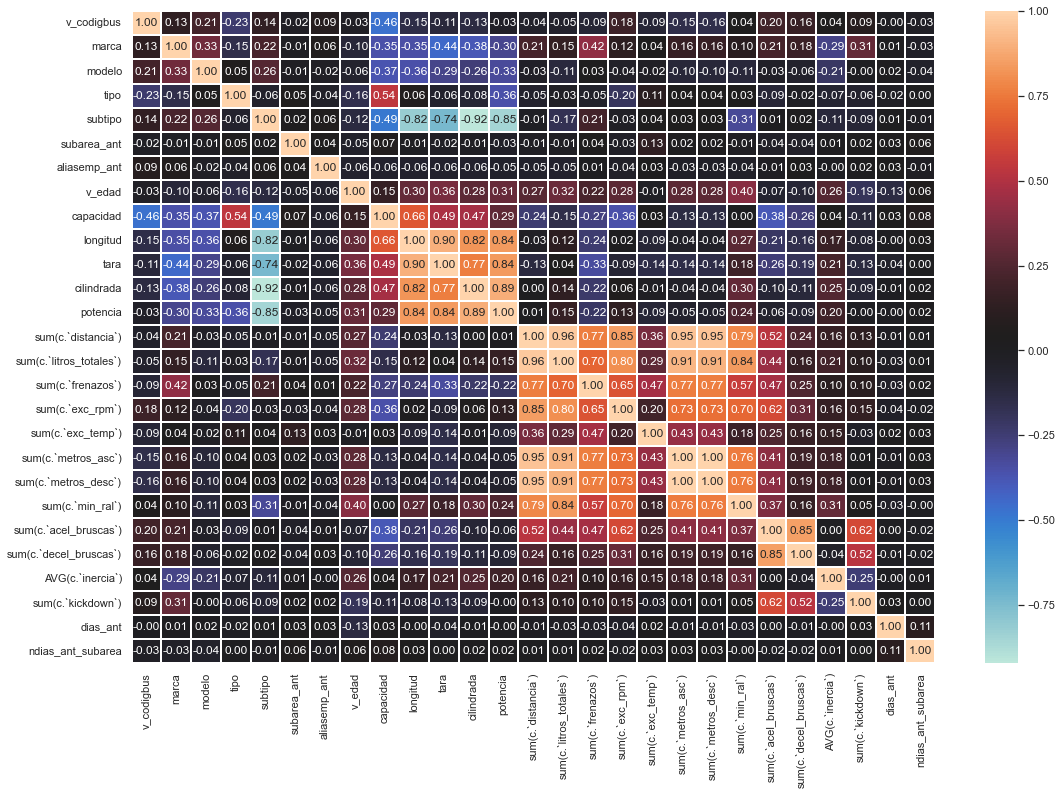

In [405]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Feature selector

In [406]:
df_norm

,v_codigbus,marca,modelo,tipo,subtipo,subarea_ant,aliasemp_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias_ant,ndias_ant_subarea
0,1,1,1,1,1,1,1,1.482668,1.132019,1.020087,0.859532,0.505800,0.724645,4.111322,4.444203,0.504698,3.793601,-0.301313,3.730009,3.722149,4.623694,0.650329,-0.084278,0.136433,0.001761,108,108
1,2,2,2,1,1,1,1,0.245930,0.007130,-0.286234,-0.329087,0.668251,0.231883,4.704235,3.740954,1.746359,1.795988,0.411872,4.875004,4.866858,4.356068,1.370303,0.295332,1.223165,0.043352,95,95
2,3,1,2,1,1,1,2,-0.372439,0.288352,-0.286234,-0.341057,0.505800,0.075095,4.192504,4.128853,0.851600,3.032893,-0.312853,3.689809,3.680680,3.328586,0.057806,-0.166455,0.528091,-0.307837,124,124
3,4,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.323128,-1.257670,-0.870738,-1.081092,-0.337357,-1.148645,-1.146967,-0.981067,-0.991411,-0.446308,1.354395,-0.330792,25,25
4,4,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.167597,-1.100065,-0.790609,-0.960652,-0.326957,-0.987937,-0.986492,-0.896131,-0.912568,-0.440897,0.874099,-0.330773,28,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,42,3,3,1,2,4,8,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.589965,-0.591702,-0.168367,-1.068702,0.181932,0.268512,0.264598,-1.060740,0.386132,0.636936,-0.014479,-0.152830,27,295
1130,42,3,3,1,2,1,13,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1131,42,3,3,1,2,13,9,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.556761,-0.562804,-0.149673,-1.067074,0.188913,0.322450,0.318911,-1.060650,0.495021,0.662507,-0.078047,-0.141142,9,275
1132,42,3,3,1,2,13,9,0.245930,-1.117759,-2.201325,-1.395213,-2.370547,-2.119934,-0.535744,-0.545147,-0.142371,-1.066497,0.190053,0.360273,0.356664,-1.060405,0.561959,0.693297,-0.099099,-0.141142,6,552


In [407]:
train_labels=df_norm['dias_ant']
train=df_norm.drop(columns = 'dias_ant')

In [408]:
fs = FeatureSelector(data = train, labels = train_labels)


In [409]:
train_labels

0       108
1        95
2       124
3        25
4        28
       ... 
1129     27
1130      9
1131      9
1132      6
1133      1
Name: dias_ant, Length: 1134, dtype: int64

## Missing Values

In [410]:

fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [411]:
missing_features = fs.ops['missing']
missing_features[:10]


[]

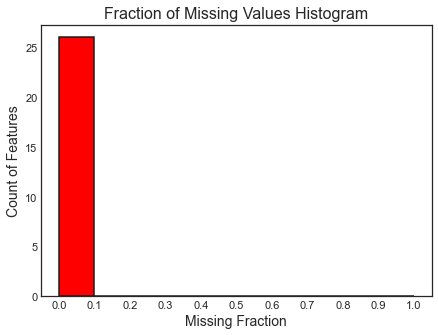

In [412]:
fs.plot_missing()

## Single Unique Value

In [413]:
fs.identify_single_unique()

0 features with a single unique value.



In [414]:
single_unique = fs.ops['single_unique']
single_unique

[]

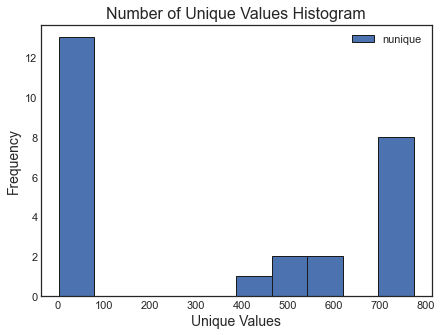

In [415]:
fs.plot_unique()

In [416]:
fs.unique_stats.sample(5)


,nunique
marca,6
sum(c.`litros_totales`),745
sum(c.`exc_temp`),522
sum(c.`acel_bruscas`),574
longitud,9


## Collinear (highly correlated) Features

In [417]:
fs.identify_collinear(correlation_threshold=0.80)

10 features with a correlation magnitude greater than 0.80.



In [418]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['longitud', 'tara', 'cilindrada', 'potencia', 'sum(c.`litros_totales`)']

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'tara'),
  Text(0, 1.5, 'sum(c.`metros_asc`)'),
  Text(0, 2.5, 'sum(c.`litros_totales`)'),
  Text(0, 3.5, 'sum(c.`distancia`)'),
  Text(0, 4.5, 'longitud'),
  Text(0, 5.5, 'cilindrada'),
  Text(0, 6.5, 'subtipo'),
  Text(0, 7.5, 'sum(c.`acel_bruscas`)')])

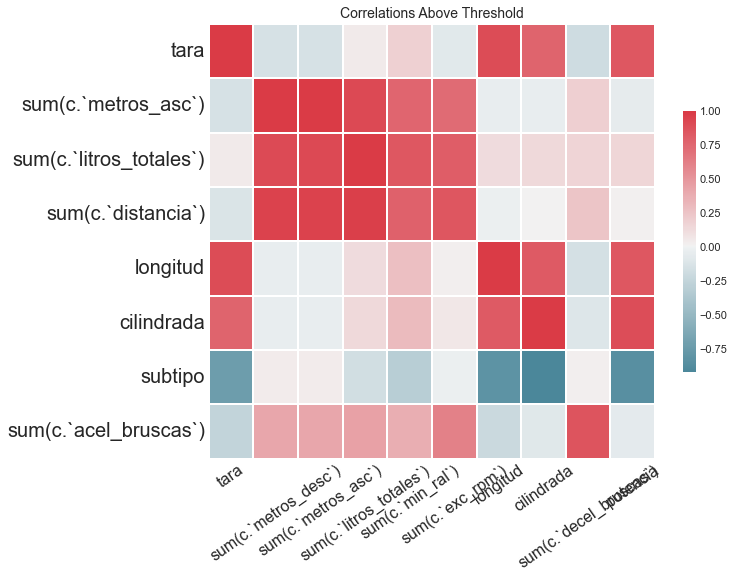

In [419]:
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)



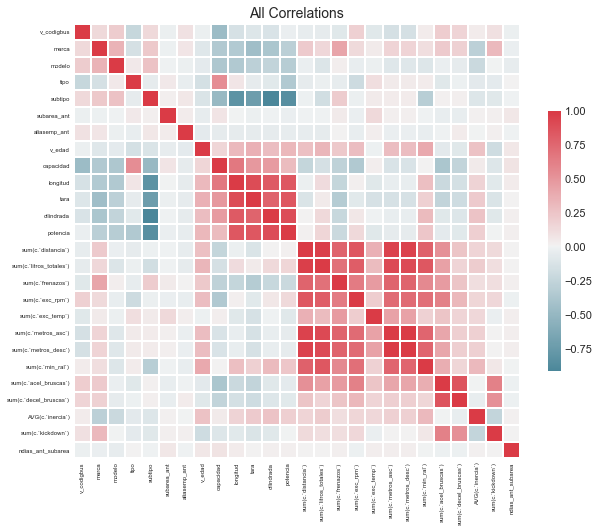

In [420]:
fs.plot_collinear(plot_all=True)

10 features with a correlation magnitude greater than 0.80.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'tara'),
  Text(0, 1.5, 'sum(c.`metros_asc`)'),
  Text(0, 2.5, 'sum(c.`litros_totales`)'),
  Text(0, 3.5, 'sum(c.`distancia`)'),
  Text(0, 4.5, 'longitud'),
  Text(0, 5.5, 'cilindrada'),
  Text(0, 6.5, 'subtipo'),
  Text(0, 7.5, 'sum(c.`acel_bruscas`)')])

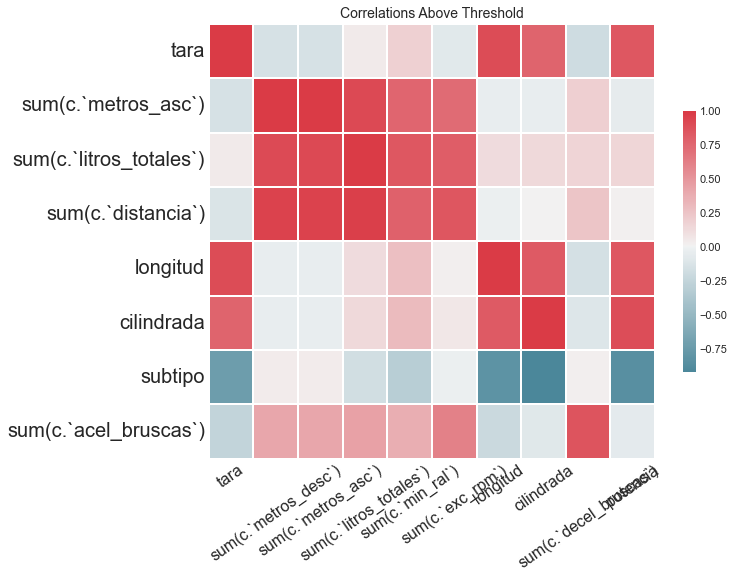

In [421]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)

In [422]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,longitud,subtipo,-0.818830
1,tara,longitud,0.901544
2,cilindrada,subtipo,-0.922327
3,cilindrada,longitud,0.822431
4,potencia,subtipo,-0.851299


## Zero Importance Features

In [423]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



In [424]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))


There are 26 original features
There are 0 one-hot features


In [425]:
fs.data_all.head(10)

,v_codigbus,marca,modelo,tipo,subtipo,subarea_ant,aliasemp_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),ndias_ant_subarea
0,1,1,1,1,1,1,1,1.482668,1.132019,1.020087,0.859532,0.505800,0.724645,4.111322,4.444203,0.504698,3.793601,-0.301313,3.730009,3.722149,4.623694,0.650329,-0.084278,0.136433,0.001761,108
1,2,2,2,1,1,1,1,0.245930,0.007130,-0.286234,-0.329087,0.668251,0.231883,4.704235,3.740954,1.746359,1.795988,0.411872,4.875004,4.866858,4.356068,1.370303,0.295332,1.223165,0.043352,95
2,3,1,2,1,1,1,2,-0.372439,0.288352,-0.286234,-0.341057,0.505800,0.075095,4.192504,4.128853,0.851600,3.032893,-0.312853,3.689809,3.680680,3.328586,0.057806,-0.166455,0.528091,-0.307837,124
3,4,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.323128,-1.257670,-0.870738,-1.081092,-0.337357,-1.148645,-1.146967,-0.981067,-0.991411,-0.446308,1.354395,-0.330792,25
4,4,1,1,1,1,2,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.167597,-1.100065,-0.790609,-0.960652,-0.326957,-0.987937,-0.986492,-0.896131,-0.912568,-0.440897,0.874099,-0.330773,310
5,4,1,1,1,1,3,1,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.127400,-1.058849,-0.766074,-0.924740,-0.324962,-0.945690,-0.944297,-0.871850,-0.889786,-0.440897,0.991150,-0.330773,305
6,4,1,1,1,1,4,3,0.245930,1.132019,1.020087,0.859532,0.505800,0.724645,-1.102426,-1.033557,-0.750885,-0.902112,-0.323680,-0.920555,-0.918006,-0.857638,-0.876202,-0.433432,0.958449,-0.330760,320
7,4,1,1,1,1,3,1,0.864299,1.132019,1.020087,0.859532,0.505800,0.724645,-0.932468,-0.860309,-0.630351,-0.737569,-0.313992,-0.742159,-0.741005,-0.776774,-0.771137,-0.394976,1.001895,-0.330751,456
8,4,1,1,1,1,5,3,0.864299,1.132019,1.020087,0.859532,0.505800,0.724645,-0.895040,-0.822419,-0.611365,-0.700870,-0.310716,-0.702600,-0.701496,-0.756007,-0.748094,-0.385612,1.027536,-0.330751,70
9,4,1,1,1,1,4,4,0.864299,1.132019,1.020087,0.859532,0.505800,0.724645,-0.842819,-0.769728,-0.584980,-0.652988,-0.306869,-0.646276,-0.645206,-0.731387,-0.718976,-0.369099,1.088338,-0.330751,546


In [426]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

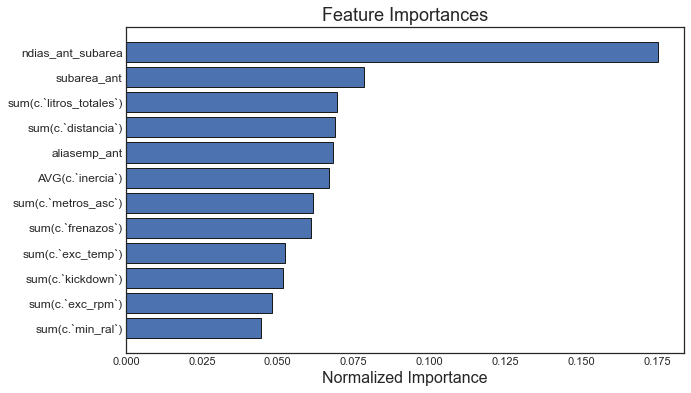

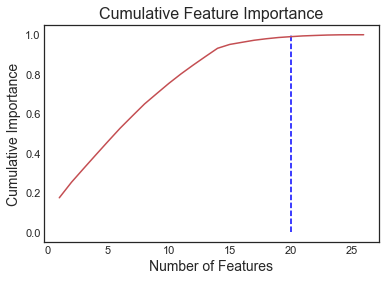

20 features required for 0.99 of cumulative importance


In [427]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [428]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,ndias_ant_subarea,5255.0,0.175167,0.175167
1,subarea_ant,2356.0,0.078533,0.253700
2,sum(c.`litros_totales`),2089.0,0.069633,0.323333
3,sum(c.`distancia`),2066.0,0.068867,0.392200
4,aliasemp_ant,2046.0,0.068200,0.460400
5,AVG(c.`inercia`),2009.0,0.066967,0.527367
6,sum(c.`metros_asc`),1850.0,0.061667,0.589033
7,sum(c.`frenazos`),1824.0,0.060800,0.649833
8,sum(c.`exc_temp`),1570.0,0.052333,0.702167
9,sum(c.`kickdown`),1555.0,0.051833,0.754000


In [429]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)


26

## Low Importance Features


In [430]:
fs.identify_low_importance(cumulative_importance = 0.99)

19 features required for cumulative importance of 0.99 after one hot encoding.
7 features do not contribute to cumulative importance of 0.99.



In [431]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['tara', 'potencia', 'marca', 'longitud', 'cilindrada']

## Removing Features

In [432]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [433]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 0 features.


In [434]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 13 features identified for removal


['sum(c.`decel_bruscas`)', 'potencia', 'tipo']

In [435]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 13 features.


## Handling One-Hot Features

In [436]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)


['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 13 features including one-hot features.


In [437]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 26
Final Number of Features:  13


In [438]:
train_removed_all

,v_codigbus,modelo,subarea_ant,aliasemp_ant,v_edad,capacidad,sum(c.`distancia`),sum(c.`frenazos`),sum(c.`exc_temp`),sum(c.`acel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),ndias_ant_subarea
0,1,1,1,1,1.482668,1.132019,4.111322,0.504698,-0.301313,0.650329,0.136433,0.001761,108
1,2,2,1,1,0.245930,0.007130,4.704235,1.746359,0.411872,1.370303,1.223165,0.043352,95
2,3,2,1,2,-0.372439,0.288352,4.192504,0.851600,-0.312853,0.057806,0.528091,-0.307837,124
3,4,1,2,3,0.245930,1.132019,-1.323128,-0.870738,-0.337357,-0.991411,1.354395,-0.330792,25
4,4,1,2,3,0.245930,1.132019,-1.167597,-0.790609,-0.326957,-0.912568,0.874099,-0.330773,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,42,3,4,8,0.245930,-1.117759,-0.589965,-0.168367,0.181932,0.386132,-0.014479,-0.152830,295
1130,42,3,1,13,0.245930,-1.117759,-0.556761,-0.149673,0.188913,0.495021,-0.078047,-0.141142,275
1131,42,3,13,9,0.245930,-1.117759,-0.556761,-0.149673,0.188913,0.495021,-0.078047,-0.141142,275
1132,42,3,13,9,0.245930,-1.117759,-0.535744,-0.142371,0.190053,0.561959,-0.099099,-0.141142,552


### Analisis de componentes principales

features_t1=['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca',
       'modelo', 'tipo', 'subtipo', 'subarea_ant', 'v_edad',
       'capacidad', 'longitud', 'tara', 'cilindrada', 'potencia', 'dias_ant',
       'ndias_ant_subarea']
df_norm=df_target1[features_t1]
df_norm.reset_index(drop = True, inplace = True)


In [439]:
df_feat = np.transpose(train_removed_all)
#df_feat=df_feat.drop('target', 0)
names =  df_feat.index
names

Index(['v_codigbus', 'modelo', 'subarea_ant', 'aliasemp_ant', 'v_edad',
       'capacidad', 'sum(c.`distancia`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_temp`)', 'sum(c.`acel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'ndias_ant_subarea'],
      dtype='object')

In [440]:
len(names)

13

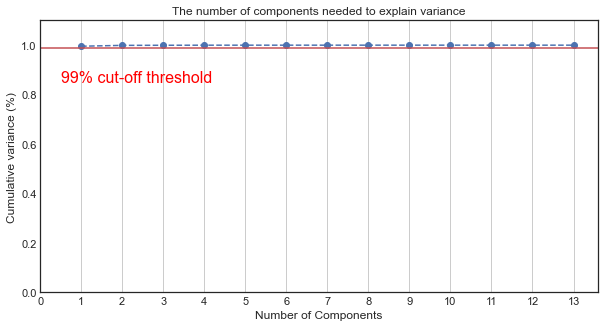

In [441]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.79417484 0.15658305]


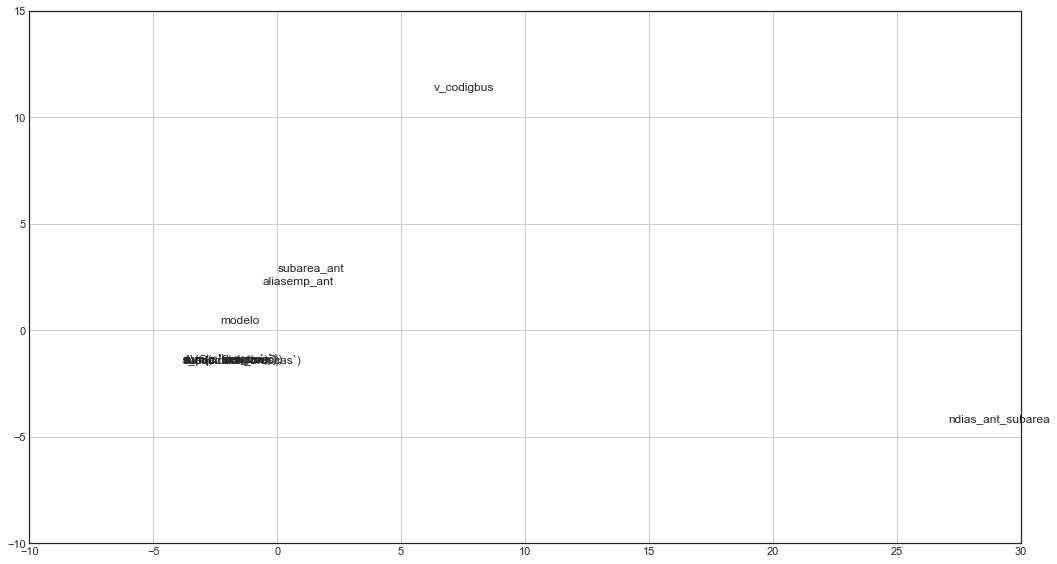

In [442]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components =2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-10, 30)
plt.ylim(-10, 15)
ax.grid(True)
fig.tight_layout()
plt.show()

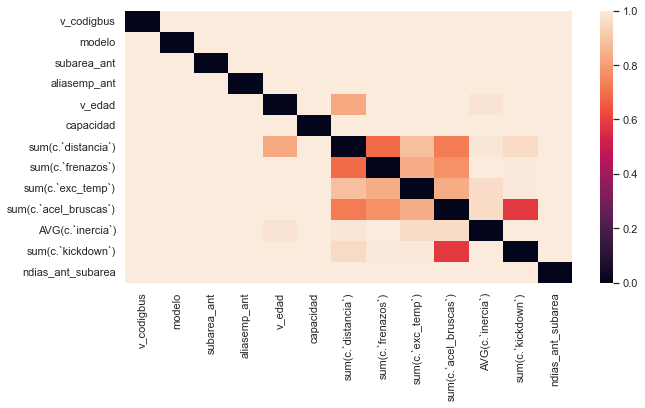

In [443]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

C:\Users\Dani\AppData\Local\Temp/ipykernel_1724/3741172497.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


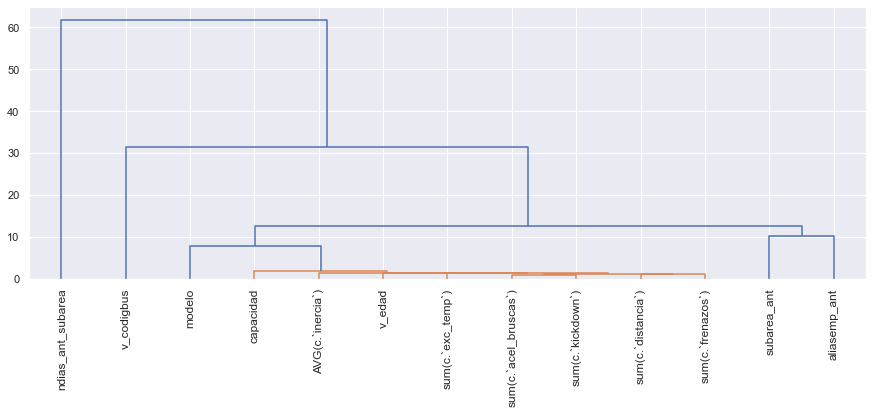

In [444]:


clusters = cluster.hierarchy.linkage(matdist, method = 'single')

plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

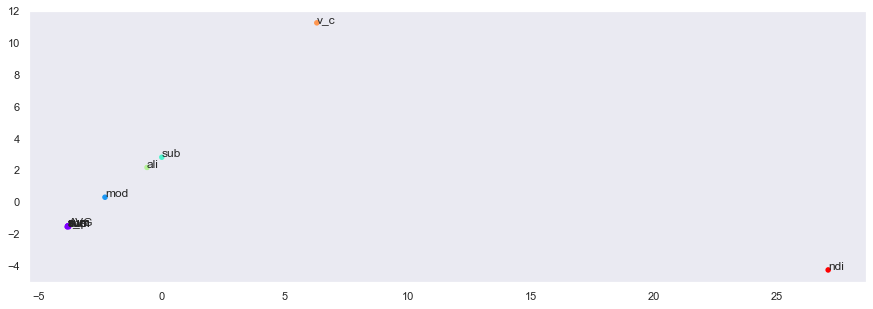

In [445]:
cut = 3 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 


plt.grid()
plt.show()

In [446]:
df_norm.columns

Index(['v_codigbus', 'marca', 'modelo', 'tipo', 'subtipo', 'subarea_ant',
       'aliasemp_ant', 'v_edad', 'capacidad', 'longitud', 'tara', 'cilindrada',
       'potencia', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'dias_ant', 'ndias_ant_subarea'],
      dtype='object')

# Reduccionde variables PCA

In [447]:
names = train_removed_all.columns
len(names)

13

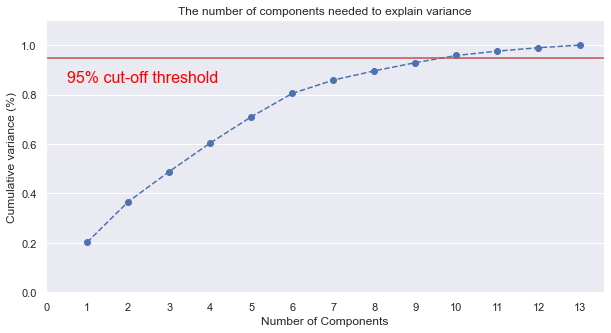

In [448]:
#names=df_norm['target']
#names2=df_norm['subtipo']

from sklearn.decomposition import PCA
min_max_scaler = preprocessing.MinMaxScaler()
#features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))
features_norm = min_max_scaler.fit_transform(train_removed_all)
pca = PCA().fit(features_norm)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [449]:
#names=df_norm['target']
names2=df_norm['subtipo']

C:\Users\Dani\AppData\Local\Temp/ipykernel_1724/2547648204.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('ndias_ant_subarea', 1))


Variance Ratio: 


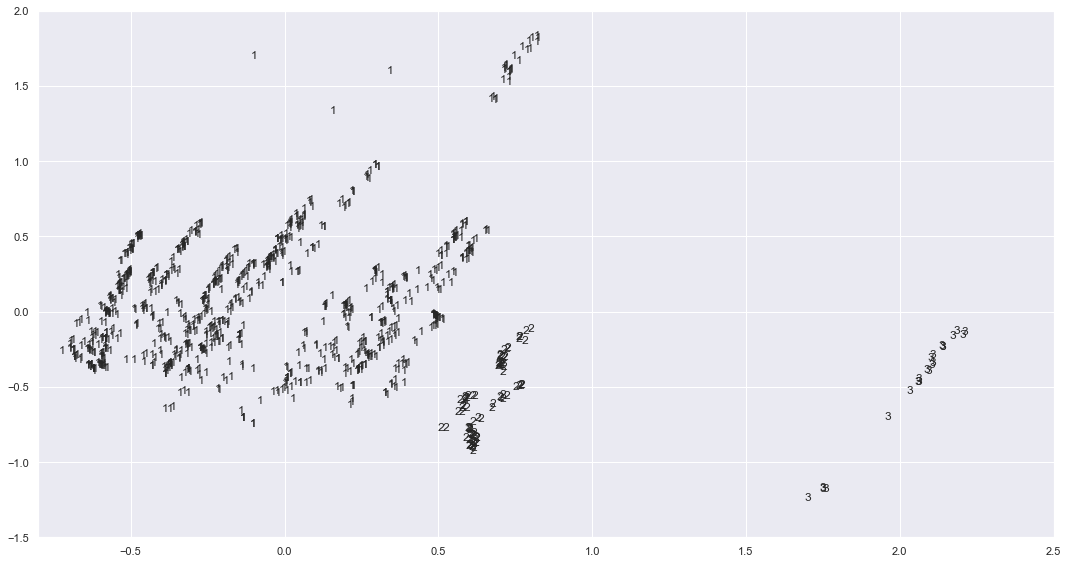

In [450]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('ndias_ant_subarea', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 9)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ")#, estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names2[i]) 


plt.xlim(-0.8, 2.5)
plt.ylim(-1.5, 2)
ax.grid(True)
fig.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.21654586418868066
For n_clusters = 3 The average silhouette_score is : 0.23503489949346518
For n_clusters = 4 The average silhouette_score is : 0.19483898427582685
For n_clusters = 5 The average silhouette_score is : 0.2035116778738832
For n_clusters = 6 The average silhouette_score is : 0.1879992991410189


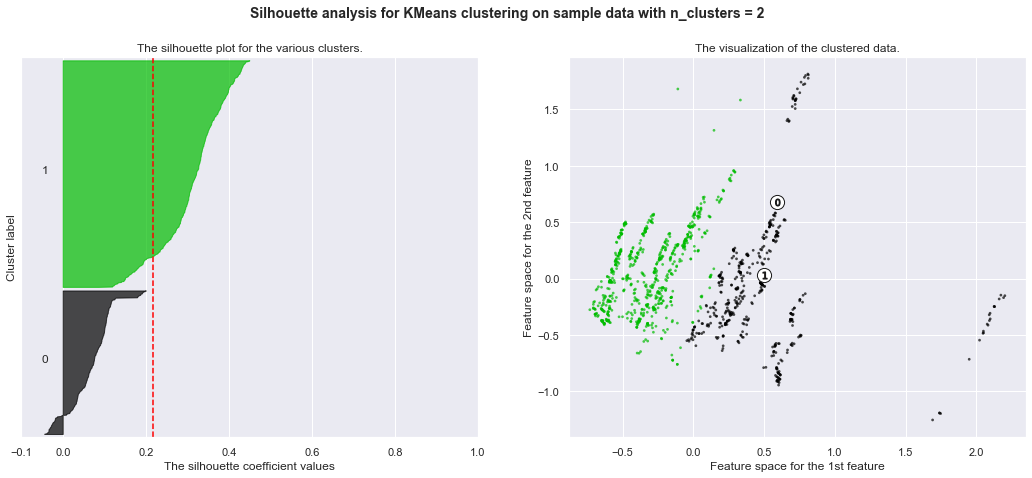

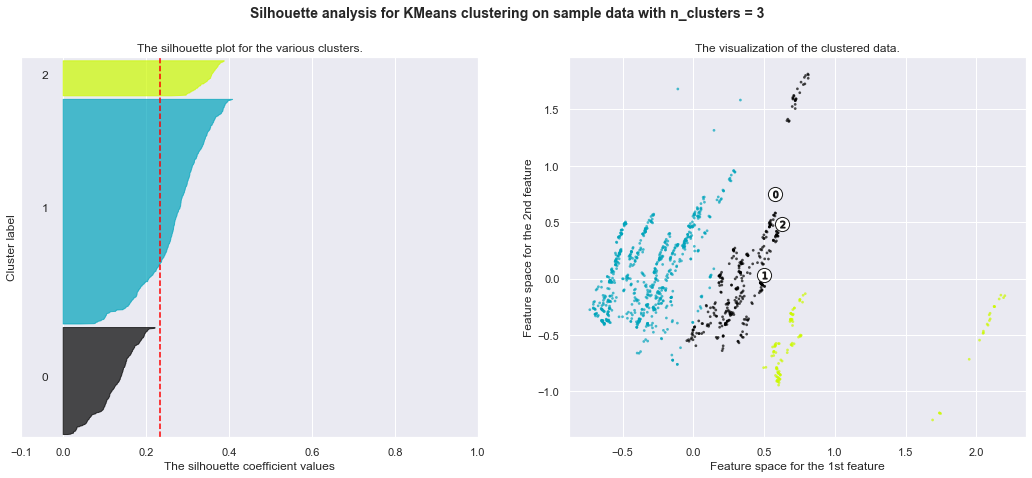

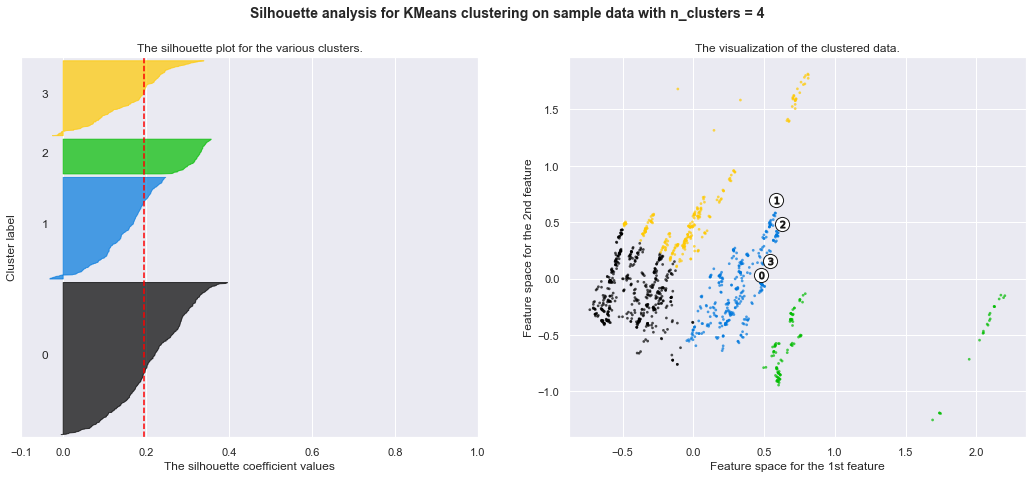

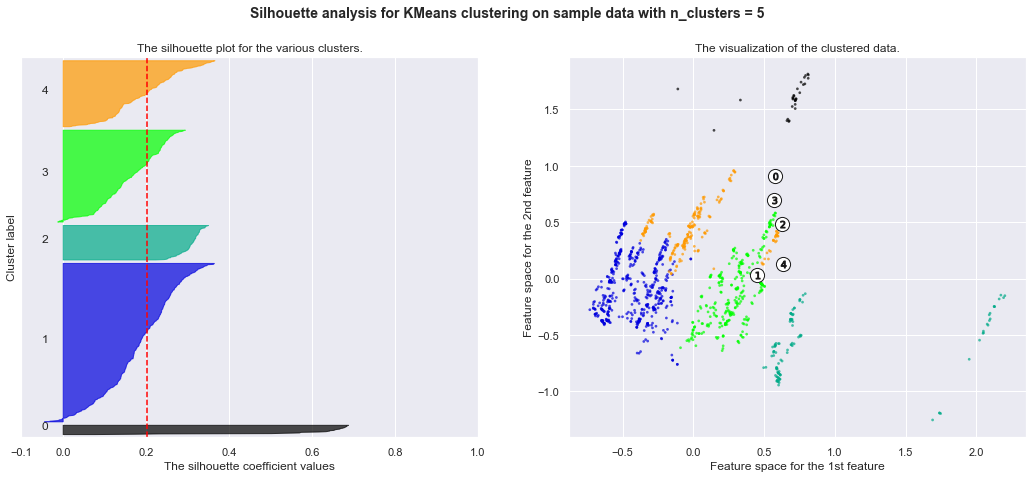

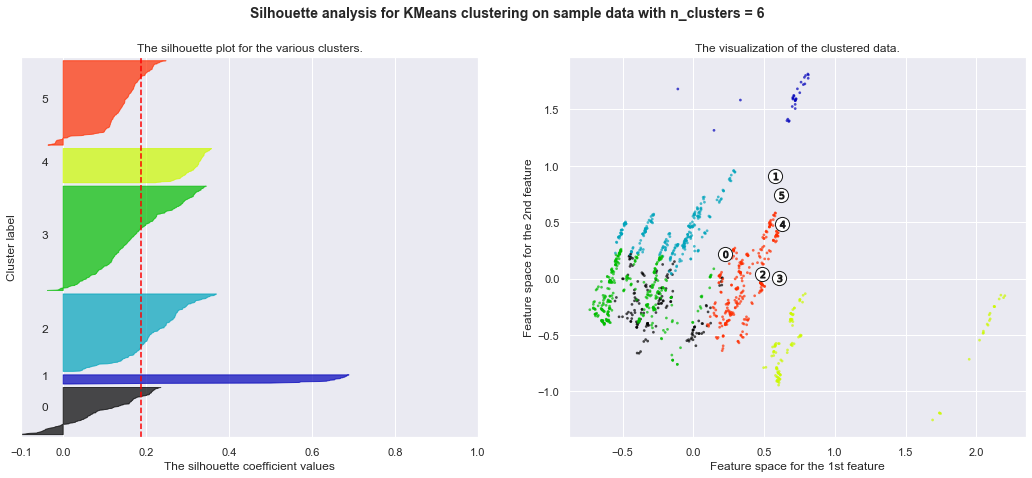

In [451]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

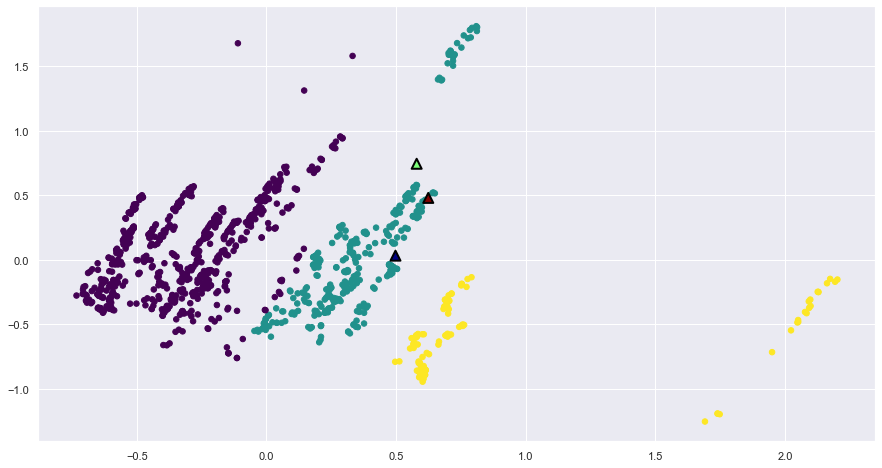

In [452]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1,2],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")

In [453]:
train_removed_all['Kmeans_cluster']= labels
train_removed_all['dias_ant']= train_labels

<AxesSubplot:>

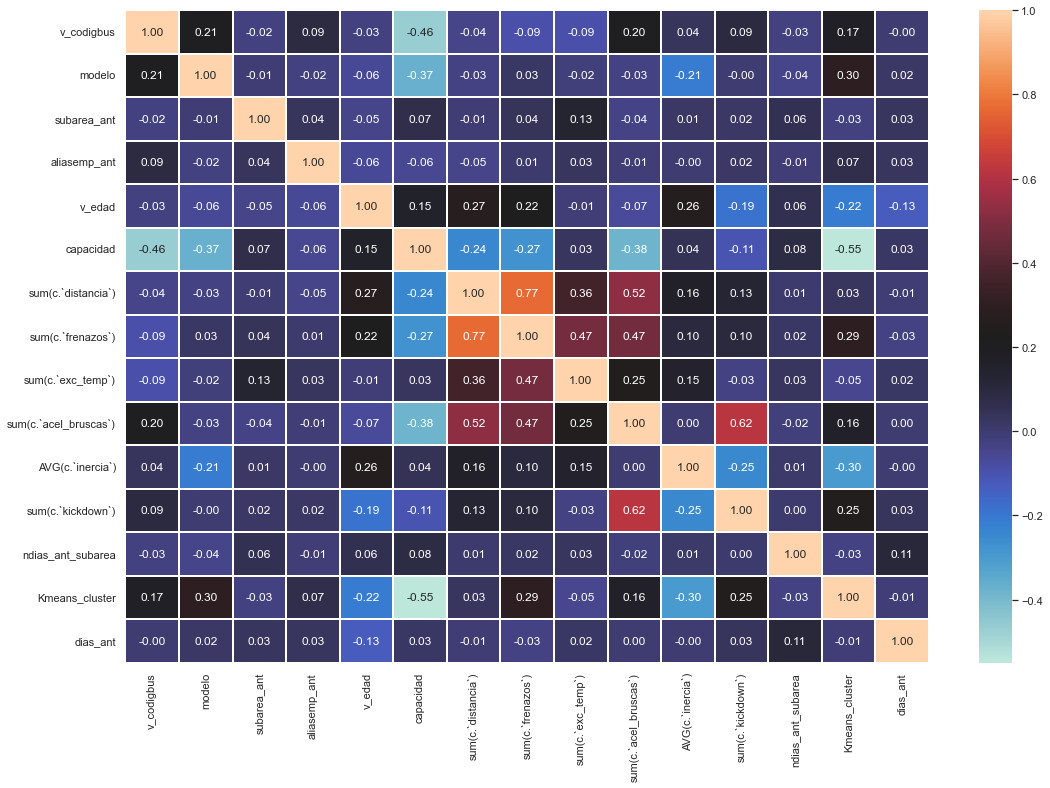

In [454]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(train_removed_all.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones.png')

In [455]:
train_removed_all.columns

Index(['v_codigbus', 'modelo', 'subarea_ant', 'aliasemp_ant', 'v_edad',
       'capacidad', 'sum(c.`distancia`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_temp`)', 'sum(c.`acel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'ndias_ant_subarea', 'Kmeans_cluster', 'dias_ant'],
      dtype='object')

In [483]:

features=['v_codigbus', 'modelo', 'subarea_ant', 'aliasemp_ant', 'v_edad',
       'capacidad', 'sum(c.`distancia`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_temp`)', 'sum(c.`acel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)','Kmeans_cluster','ndias_ant_subarea', 'dias_ant']
            
new_df=train_removed_all[features]


C:\Users\Dani\AppData\Local\Temp/ipykernel_1724/1821064085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['v_edad_2']=np.cbrt((new_df['v_edad']))


<AxesSubplot:>

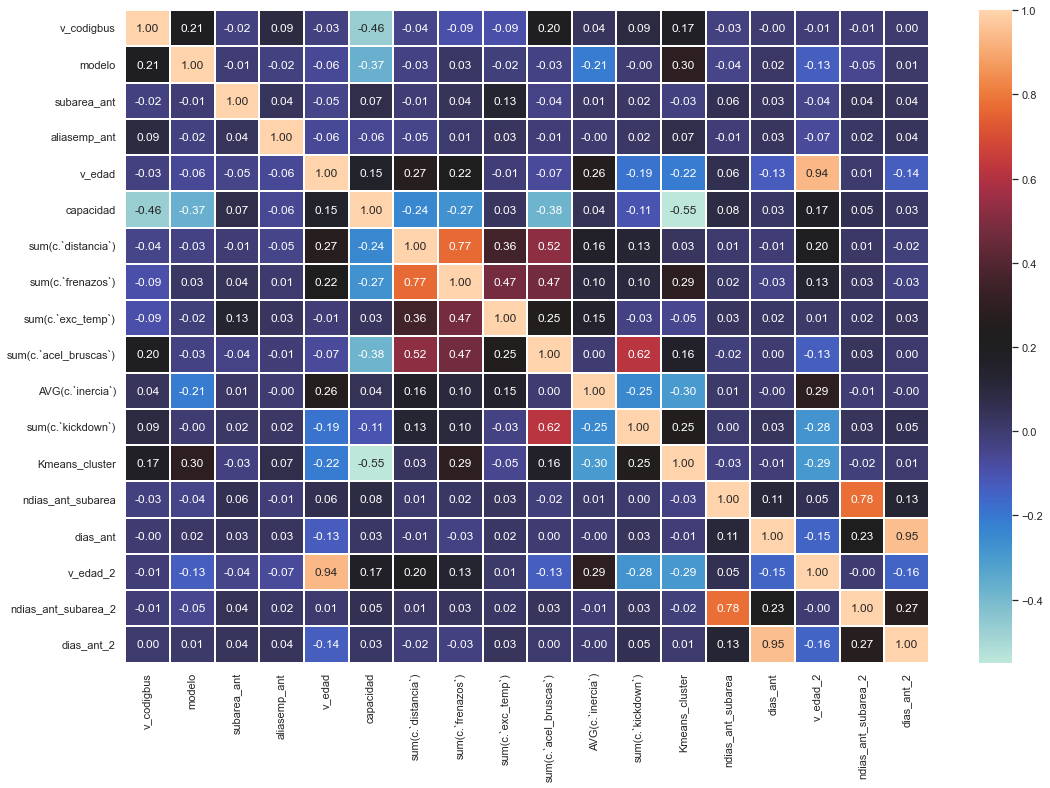

In [484]:
#Transformaciones
import math

new_df['v_edad_2']=np.cbrt((new_df['v_edad']))
new_df['ndias_ant_subarea_2']=np.log((new_df['ndias_ant_subarea']))
new_df['dias_ant_2']=np.sqrt((new_df['dias_ant']))
#new_df['aliasemp_ant_2']=np.cbrt((new_df['aliasemp_ant']))
#new_df['capacidad_2']=np.cbrt((new_df['capacidad']))




f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(new_df.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones2.png')

In [485]:
round(new_df.isna().sum() * 100 / len(new_df),2)

v_codigbus               0.0
modelo                   0.0
subarea_ant              0.0
aliasemp_ant             0.0
v_edad                   0.0
capacidad                0.0
sum(c.`distancia`)       0.0
sum(c.`frenazos`)        0.0
sum(c.`exc_temp`)        0.0
sum(c.`acel_bruscas`)    0.0
AVG(c.`inercia`)         0.0
sum(c.`kickdown`)        0.0
Kmeans_cluster           0.0
ndias_ant_subarea        0.0
dias_ant                 0.0
v_edad_2                 0.0
ndias_ant_subarea_2      0.0
dias_ant_2               0.0
dtype: float64

In [486]:
new_df.columns

Index(['v_codigbus', 'modelo', 'subarea_ant', 'aliasemp_ant', 'v_edad',
       'capacidad', 'sum(c.`distancia`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_temp`)', 'sum(c.`acel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'Kmeans_cluster', 'ndias_ant_subarea', 'dias_ant',
       'v_edad_2', 'ndias_ant_subarea_2', 'dias_ant_2'],
      dtype='object')

In [487]:
features_ndf=['v_codigbus', 'modelo', 'subarea_ant', 'aliasemp_ant',
       'capacidad', 'sum(c.`distancia`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_temp`)', 'sum(c.`acel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'Kmeans_cluster',
       'v_edad_2', 'ndias_ant_subarea_2', 'dias_ant_2']

newdf=new_df[features_ndf]

In [488]:

X_train, X_test, y_train, y_test = train_test_split(
                                        newdf.drop(columns = 'dias_ant_2'),
                                        newdf['dias_ant_2'],
                                        test_size=0.25,
                                        random_state = 123
                                    )



# Modelado

In [489]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer,accuracy_score, mean_absolute_error, mean_squared_error,r2_score

#‘neg_mean_absolute_error’
#‘neg_mean_squared_error’
#‘neg_root_mean_squared_error’
#r2

## Iteraciones

In [490]:
iteraciones=10

# LinearRegression

In [498]:
target='Dispositivo 560'

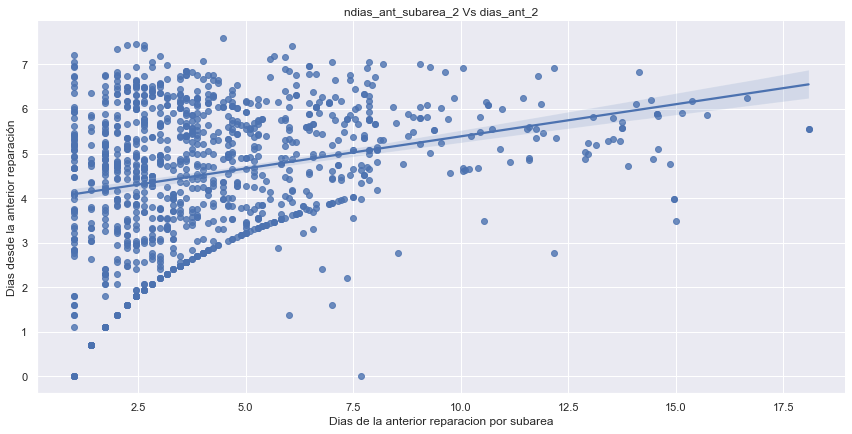

In [492]:
sns.lmplot(y='ndias_ant_subarea_2',x='dias_ant_2',data=newdf,aspect=2,height=6)
plt.xlabel('Dias de la anterior reparacion por subarea')
plt.ylabel('Dias desde la anterior reparación')
plt.title('ndias_ant_subarea_2 Vs dias_ant_2');

### parametros

In [494]:
parameters_LR={'fit_intercept':[True],
               'normalize':[True,False],
               'copy_X':[True],
               'n_jobs':[-1],
               'positive':[False]
            }

In [495]:
LR=LinearRegression()
ran_LR=RandomizedSearchCV(LR,parameters_LR,cv=5,scoring='r2',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_LR.fit(X_train,y_train)

C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True], 'n_jobs': [-1],
                                        'normalize': [True, False],
                                        'positive': [False]},
                   random_state=0, scoring='r2', verbose=1)

In [496]:
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))
print("CV score=%0.3f" % ran_LR.best_score_)
cv_results_LR = ran_LR.cv_results_

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
CV score=0.067


In [505]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))

print('\nLinearRegression \n\nTRAIN ')
print("Best score R2=%0.4f" % ran_LR.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_LR.best_params_
LR_ran = LinearRegression(fit_intercept= model['fit_intercept'],
                          normalize=model['normalize'],
                          copy_X=model['copy_X'],
                          n_jobs=-1,
                          positive=model['positive']
                                )



#Predicción
LR_ran.fit(X_train,y_train)
y_pred = LR_ran.predict(X_test)
mae_LR = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
#print ('MAE prediction: ', mae_LR)

r2_LR=r2_score((y_test), (y_pred))#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_LR+'\n')


print('LinearRegression \n')
#print(r2_score(y_test, y_pred))
print('\n')

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
#theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X_train.columns.values)
#parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

mse_LR = mean_squared_error(y_pred, y_test)

# R_square
R_square_LR = LR_ran.score(X_test,y_test)
print ('Erro medio absoluto (MAE) : ', mae_LR)
print('\nError cuadratico media(MSE) : ',mse_LR)
print('\nR cuadrado :',R_square_LR)
print('\n')

sk_theta = [LR_ran.intercept_]+list(LR_ran.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(parameter_df)

#importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': LR_ran.feature_importances_})

#print('Importancia LinearRegression:\n ',importancia)
#print('\n')
#plt.suptitle('Importancia LinearRegression ')
#x=parameter_df.columns
#y=parameter_df.Sklearn_theta
#my_color = np.where(y>=0.1, 'orange', 'skyblue')
#plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_LR = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

DISPOSITIVO 560
RandomSearch

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}

LinearRegression 

TRAIN 
Best score R2=0.0669


PREDICCIÓN  

R2 :0.0488

LinearRegression 



Erro medio absoluto (MAE) :  2.139701067916371

Error cuadratico media(MSE) :  7.960061901405971

R cuadrado : 0.04875626576759906


   Parameter                Columns  Sklearn_theta
0    theta_0        intersect:x_0=1       1.683084
1    theta_1             v_codigbus       0.009204
2    theta_2                 modelo      -0.002162
3    theta_3            subarea_ant      -0.004595
4    theta_4           aliasemp_ant       0.013737
5    theta_5              capacidad       0.248646
6    theta_6     sum(c.`distancia`)       0.274070
7    theta_7      sum(c.`frenazos`)      -0.154718
8    theta_8      sum(c.`exc_temp`)       0.064444
9    theta_9  sum(c.`acel_bruscas`)      -0.164996
10  theta_10       AVG(c.`inercia`)       0.062523
1

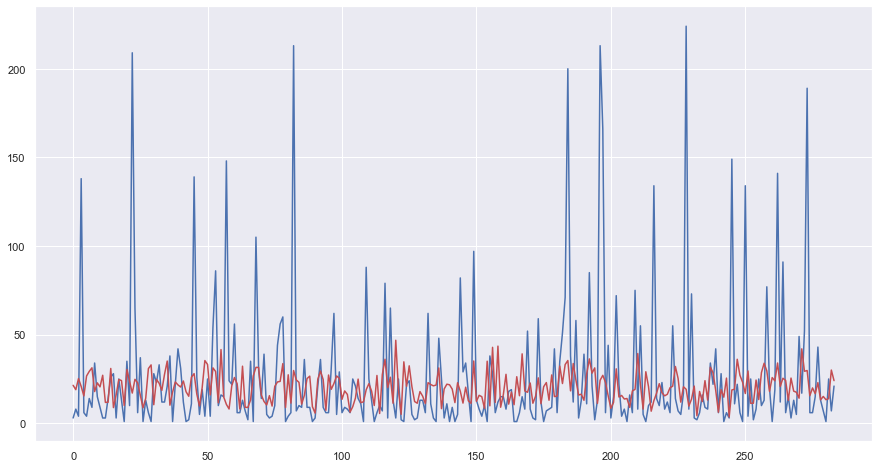

In [506]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_LR.Real)), output_LR.Real, '-b',label='Actual')
ax.plot(range(len(output_LR.Predicho)), output_LR.Predicho, 'r', label='Predicted')
plt.show()

C:\Users\Dani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Dani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


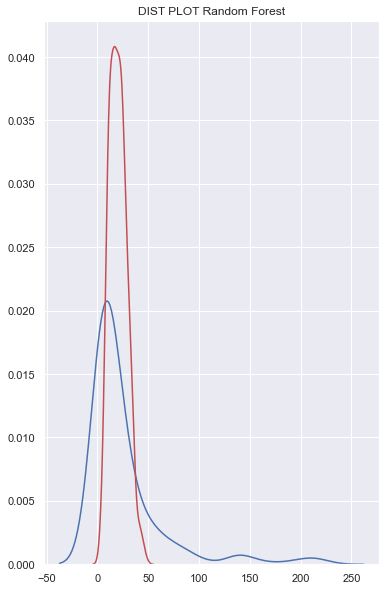

In [507]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(output_LR.Real, hist=False, color="b", label="Actual Value")
sns.distplot(output_LR.Predicho, hist=False, color="r", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

# DecisionTreeRegressor

In [508]:
iteraciones=100

### parametros

In [509]:
parameters_DT={#'splitter': ['best', 'random'],
               'criterion':['mae'],
               'max_depth': np.arange(2,100,1), 
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               #'min_weight_fraction_leaf': np.arange(0.0,0.5,0.1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
              
            }

In [510]:
DT=DecisionTreeRegressor(random_state=0)
ran_DT=RandomizedSearchCV(DT,parameters_DT,cv=5,scoring='r2',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_DT.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mae'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             

In [511]:
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))
print("CV score=%0.3f" % ran_DT.best_score_)
cv_results = ran_DT.cv_results_

Best parameters from Randomsearch: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'mae'}
CV score=-0.024


DISPOSITIVO 560
RandomSearch

Best parameters from Randomsearch: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'mae'}

DecisionTreeRegressor 

TRAIN 
Best score R2=-0.0240


PREDICCIÓN  

R2 :-0.1376

Erro medio absoluto (MAE) :  2.171991757226506

Error cuadratico media(MSE) :  9.519818076455516

R cuadrado : -0.13763779835194168



DecisionTreeRegressor 



Importancia DecisionTreeRegressor:
                    feature  importancia
0              v_codigbus     0.237217
1                  modelo     0.000000
2             subarea_ant     0.065929
3            aliasemp_ant     0.055654
4               capacidad     0.038519
5      sum(c.`distancia`)     0.111021
6       sum(c.`frenazos`)     0.040037
7       sum(c.`exc_temp`)     0.050668
8   sum(c.`acel_bruscas`)     0.000000
9        AVG(c.`inercia`)     0.133575
10      sum(c.`kickdown`)     0.037407
11         Kmeans_cluster     0.000000
12               v_edad_2     0.024967


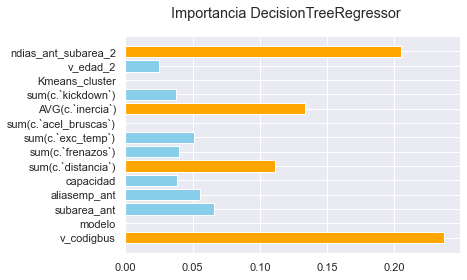

In [512]:
### constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))

print('\nDecisionTreeRegressor \n\nTRAIN ')
print("Best score R2=%0.4f" % ran_DT.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_DT.best_params_
DT_ran = DecisionTreeRegressor(random_state=0,
                          criterion= model['criterion'],
                          #splitter=model['splitter'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          #min_weight_fraction_leaf=model['min_weight_fraction_leaf'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #ccp_alpha=model['ccp_alpha']
                                )




#Predicción
DT_ran.fit(X_train,y_train)
y_pred = DT_ran.predict(X_test)
mae_DT = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
#print ('MAE prediction: ', mae_DT)

r2_DT=r2_score(y_test, y_pred)#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_DT+'\n')


mse_DT = mean_squared_error(y_pred, y_test)

# R_square
R_square_DT = DT_ran.score(X_test,y_test)
 

print ('Erro medio absoluto (MAE) : ', mae_DT)
print('\nError cuadratico media(MSE) : ',mse_DT)
print('\nR cuadrado :',R_square_DT)
print('\n')

print('\nDecisionTreeRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': DT_ran.feature_importances_})

print('Importancia DecisionTreeRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia DecisionTreeRegressor ')
x=X_test.columns
y=DT_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_DT = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

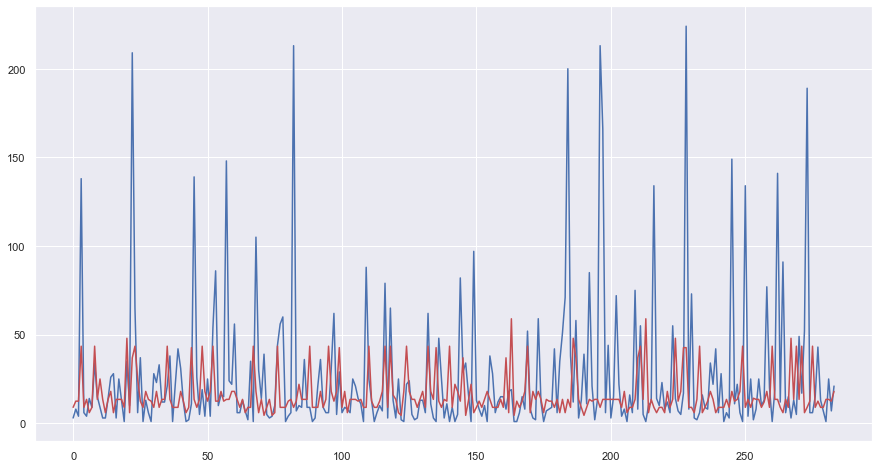

In [513]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_DT.Real)), output_DT.Real, '-b',label='Actual')
ax.plot(range(len(output_DT.Predicho)), output_DT.Predicho, 'r', label='Predicted')
plt.show()

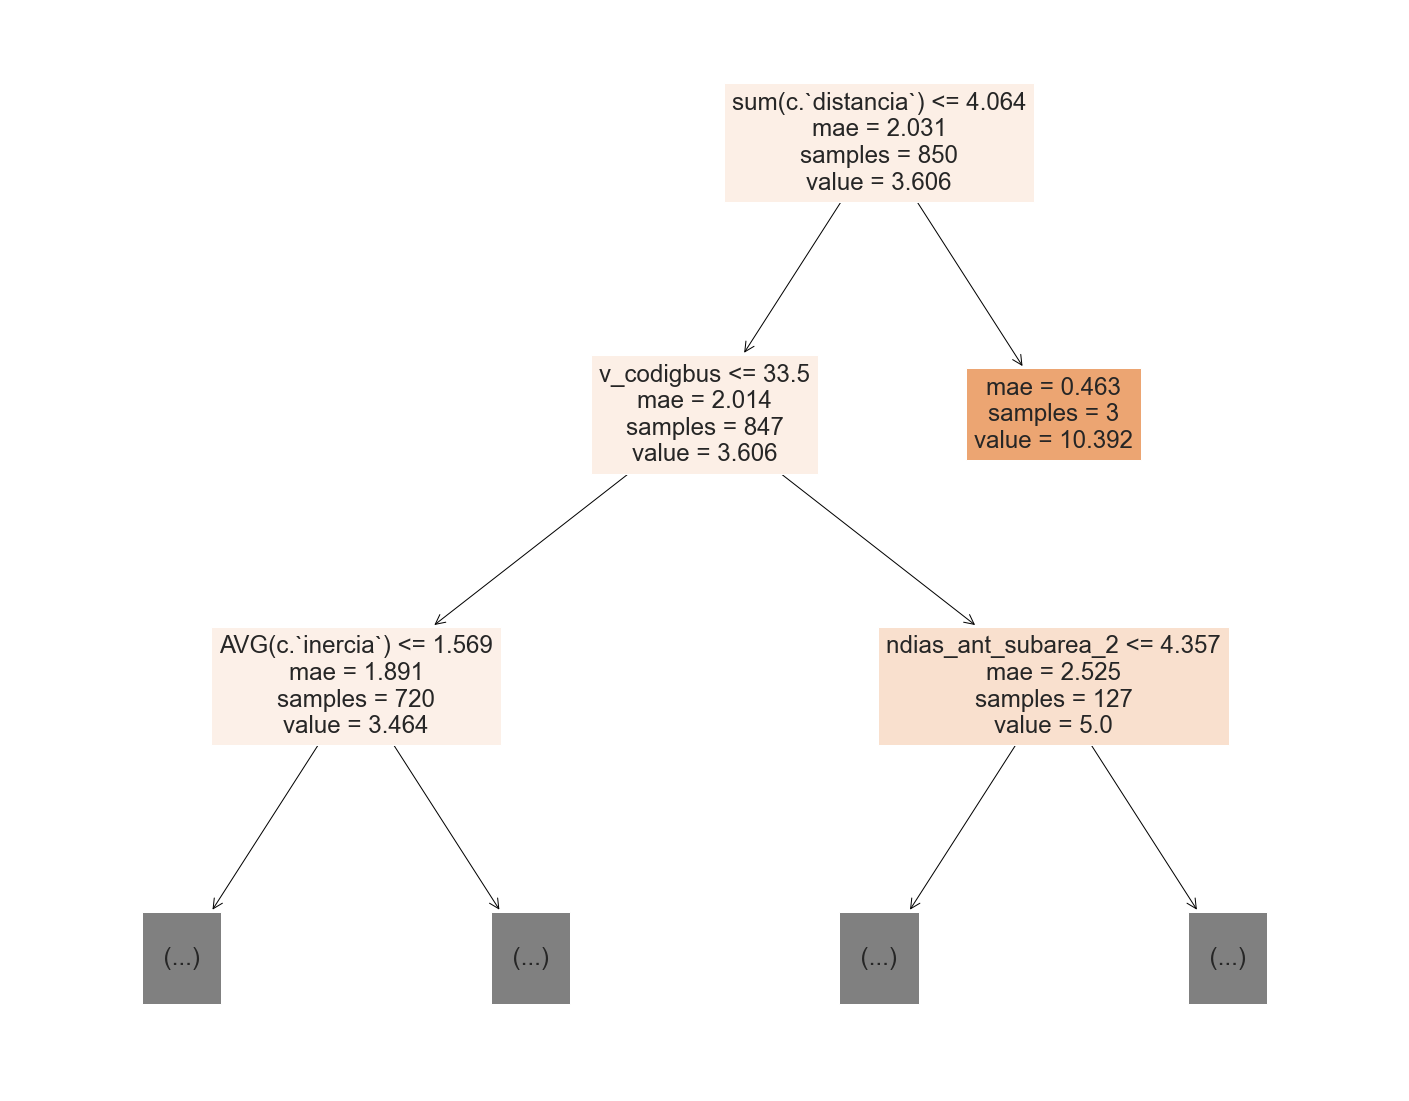

In [514]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_ran, 
                   feature_names=X_test.columns,  
                   class_names=y_test,
                   filled=True,
                   max_depth=2
                  )

In [515]:
text_representation = tree.export_text(DT_ran)
#r = export_text(decision_tree, feature_names=iris['feature_names'])
print(text_representation)

|--- feature_5 <= 4.06
|   |--- feature_0 <= 33.50
|   |   |--- feature_9 <= 1.57
|   |   |   |--- feature_3 <= 2.00
|   |   |   |   |--- feature_9 <= -1.18
|   |   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |   |--- value: [7.68]
|   |   |   |   |   |--- feature_0 >  22.50
|   |   |   |   |   |   |--- value: [2.65]
|   |   |   |   |--- feature_9 >  -1.18
|   |   |   |   |   |--- feature_7 <= -0.27
|   |   |   |   |   |   |--- value: [2.45]
|   |   |   |   |   |--- feature_7 >  -0.27
|   |   |   |   |   |   |--- value: [3.53]
|   |   |   |--- feature_3 >  2.00
|   |   |   |   |--- feature_9 <= -0.81
|   |   |   |   |   |--- feature_4 <= 0.99
|   |   |   |   |   |   |--- value: [4.24]
|   |   |   |   |   |--- feature_4 >  0.99
|   |   |   |   |   |   |--- value: [3.61]
|   |   |   |   |--- feature_9 >  -0.81
|   |   |   |   |   |--- feature_10 <= -0.33
|   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |--- feature_10 >  -0.33
|   |   |   |   |   |   |--- value:

# RandomForestRegressor

In [523]:
iteraciones=10

### Parametros

In [524]:
parameters_RF={'bootstrap': [True, False],
               'criterion':['mae'],
               'max_depth': np.arange(2,200,1), 
               'min_samples_leaf': np.arange(1,5,1),
               'min_samples_split':  np.arange(2,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               'n_estimators':np.arange(10,100,1),
               #'oob_score':[True, False],
               #'ccp_alpha':np.arange(0.0,1,0.1)
               
            }

In [525]:
RF=RandomForestRegressor(random_state=0)
ran_RF=RandomizedSearchCV(RF,parameters_RF,cv=5,scoring='r2',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_RF.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mae'],
                                        'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65...
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 5

In [526]:
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))
print("CV score=%0.3f" % ran_RF.best_score_)
cv_results = ran_RF.cv_results_

Best parameters from Randomsearch: {'n_estimators': 71, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 32, 'criterion': 'mae', 'bootstrap': False}
CV score=0.197


DISPOSITIVO 560
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 71, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 32, 'criterion': 'mae', 'bootstrap': False}

RandomForestRegressorr 

TRAIN 
Best score R2=0.1974


PREDICCIÓN  

R2 :0.2305

Erro medio absoluto (MAE) :  1.7352927604656851

Error cuadratico media(MSE) :  6.438974922392573

R cuadrado : 0.23052928159721442



RandomForestRegressor 



Importancia RandomForestRegressor:
                    feature  importancia
0              v_codigbus     0.046325
1                  modelo     0.025631
2             subarea_ant     0.063028
3            aliasemp_ant     0.047191
4               capacidad     0.021287
5      sum(c.`distancia`)     0.105135
6       sum(c.`frenazos`)     0.099829
7       sum(c.`exc_temp`)     0.082121
8   sum(c.`acel_bruscas`)     0.082904
9        AVG(c.`inercia`)     0.114714
10      sum(c.`kickdown`)     0.107261
11         Kmeans_cluster     0.006834

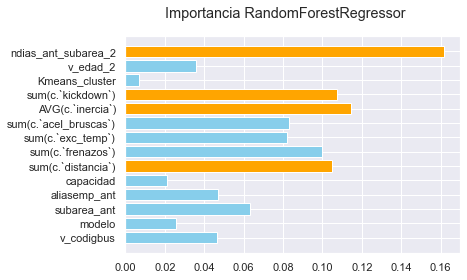

In [527]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))

print('\nRandomForestRegressorr \n\nTRAIN ')
print("Best score R2=%0.4f" % ran_RF.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_RF.best_params_
RF_ran = RandomForestRegressor(random_state=0,
                          criterion= model['criterion'],
                          bootstrap=model['bootstrap'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          n_estimators=model['n_estimators'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #oob_score=model['oob_score'],     
                          #ccp_alpha=model['ccp_alpha']
                              )



#Predicción
RF_ran.fit(X_train,y_train)
y_pred = RF_ran.predict(X_test)
mae_RF = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
#print ('MAE prediction: ', mae_RF)

r2_RF=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_RF+'\n')

mse_RF = mean_squared_error(y_pred, y_test)

# R_square
R_square_RF = RF_ran.score(X_test,y_test)


print ('Erro medio absoluto (MAE) : ', mae_RF)
print('\nError cuadratico media(MSE) : ',mse_RF)
print('\nR cuadrado :',R_square_RF)
print('\n')

print('\nRandomForestRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia RandomForestRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia RandomForestRegressor ')
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_RF = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

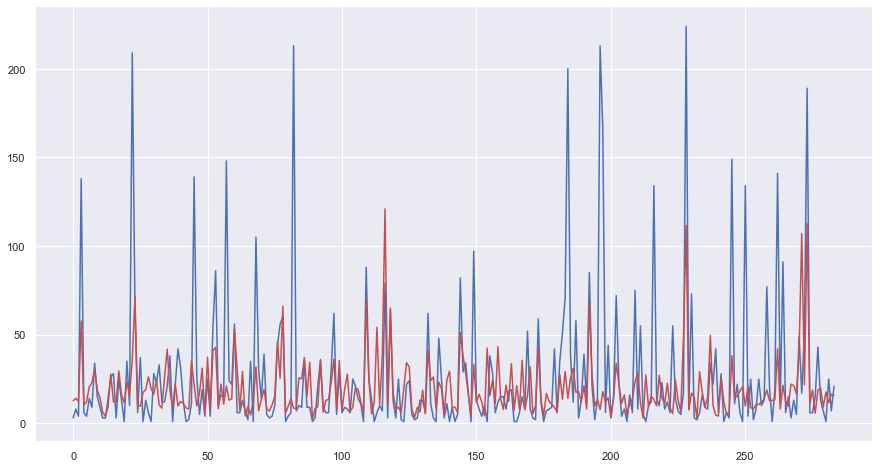

In [528]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_RF.Real)), output_RF.Real, '-b',label='Actual')
ax.plot(range(len(output_RF.Predicho)), output_RF.Predicho, 'r', label='Predicted')
plt.show()

# AdaBoostRegressor

In [529]:
iteraciones=10

### Parametros

In [530]:
parameters_AB={'base_estimator': [RF_ran],# DT_ran],
               'n_estimators':np.arange(10,100,1),
               'learning_rate':np.arange(0.1,2,0.1),
               'loss':['linear', 'square', 'exponential'] 
            }

In [531]:
AB=AdaBoostRegressor(random_state=0)
ran_AB=RandomizedSearchCV(AB,parameters_AB,cv=5,scoring='r2',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_AB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'base_estimator': [RandomForestRegressor(bootstrap=False,
                                                                                 criterion='mae',
                                                                                 max_depth=32,
                                                                                 max_features='sqrt',
                                                                                 min_samples_split=5,
                                                                                 n_estimators=71,
                                                                                 random_state=0)],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8...
                                        'loss': ['linear', 'squa

In [532]:
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))
print("CV score=%0.3f" % ran_AB.best_score_)
cv_results = ran_AB.cv_results_

Best parameters from Randomsearch: {'n_estimators': 53, 'loss': 'exponential', 'learning_rate': 0.4, 'base_estimator': RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=32,
                      max_features='sqrt', min_samples_split=5, n_estimators=71,
                      random_state=0)}
CV score=0.213


DISPOSITIVO 560
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 53, 'loss': 'exponential', 'learning_rate': 0.4, 'base_estimator': RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=32,
                      max_features='sqrt', min_samples_split=5, n_estimators=71,
                      random_state=0)}

AdaBoostRegressor 

TRAIN 
Best score R2=0.2126


PREDICCIÓN  

R2 :0.2492

Erro medio absoluto (MAE) :  1.7878965842943328

Error cuadratico media(MSE) :  6.283044750496731

R cuadrado : 0.24916325716560817



AdaBoostRegressor 



Importancia AdaBoostRegressor:
                    feature  importancia
0              v_codigbus     0.047886
1                  modelo     0.026471
2             subarea_ant     0.076591
3            aliasemp_ant     0.066893
4               capacidad     0.028336
5      sum(c.`distancia`)     0.100311
6       sum(c.`frenazos`)     0.096369
7       sum(c.`exc_temp`)     0.087972
8   sum(c.`acel_bruscas`)     0.083606
9   

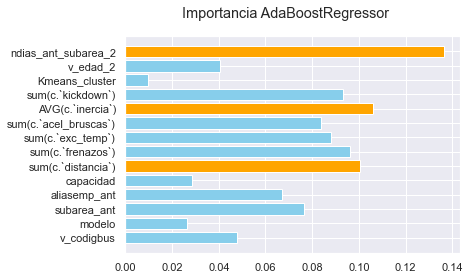

In [533]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score R2=%0.4f" % ran_AB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_AB.best_params_
AB_ran = AdaBoostRegressor(random_state=0,
                          base_estimator= model['base_estimator'],
                          n_estimators=model['n_estimators'],
                          learning_rate=model['learning_rate'],
                          loss=model['loss']
                              )



#Predicción
AB_ran.fit(X_train,y_train)
y_pred = AB_ran.predict(X_test)
mae_AB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
#print ('MAE prediction: ', mae_AB)

r2_AB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_AB+'\n')

mse_AB = mean_squared_error(y_pred, y_test)

# R_square
R_square_AB = AB_ran.score(X_test,y_test)
  

print ('Erro medio absoluto (MAE) : ', mae_AB)
print('\nError cuadratico media(MSE) : ',mse_AB)
print('\nR cuadrado :',R_square_AB)
print('\n')


print('\nAdaBoostRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': AB_ran.feature_importances_})

print('Importancia AdaBoostRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia AdaBoostRegressor ')
x=X_test.columns
y=AB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_AB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

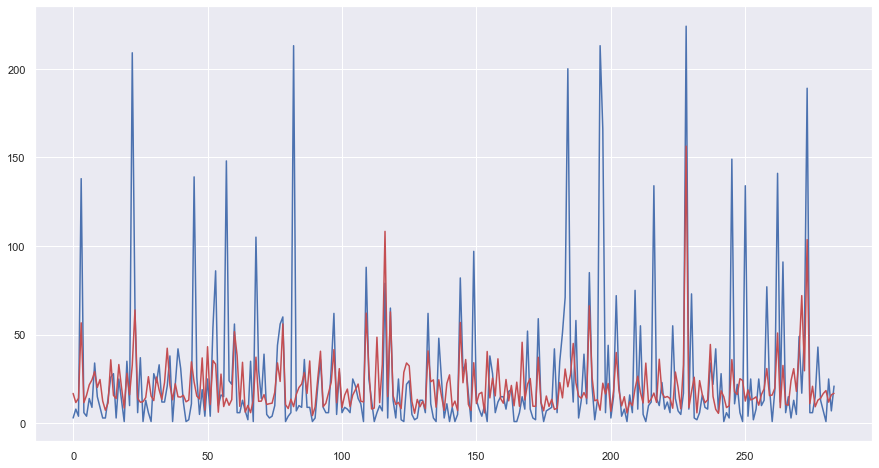

In [534]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_AB.Real)), output_AB.Real, '-b',label='Actual')
ax.plot(range(len(output_AB.Predicho)), output_AB.Predicho, 'r', label='Predicted')
plt.show()

# GradientBoostingRegressor

In [535]:
iteraciones=10

### Parametros

In [536]:
parameters_GB={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 
               'learning_rate':np.arange(0.1,2,0.1),
               'n_estimators':np.arange(10,150,1), 
               #'subsample':np.arange(0.1,2,0.1),
               'criterion':['mae'],
               'min_samples_split':  np.arange(2,11,1),
               'min_samples_leaf': np.arange(1,5,1),
               #'min_weight_fraction_leaf':np.arange(0.0,1,0.1),
               'max_depth': np.arange(2,50,1),
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'init':[None],
               'max_features':['auto', 'sqrt', 'log2'],
               #'alpha':np.arange(0.1,1.5,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
            }

In [537]:
GB=GradientBoostingRegressor(random_state=0)
ran_GB=RandomizedSearchCV(GB,parameters_GB,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_GB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ -2.86827897 -35.55350846  -3.65718669          nan          nan
  -1.91445941  -3.22883766  -4.1424121           nan  -1.87340368]
  warnings.warn(
C:\Users\Dani\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mae'],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 12

In [538]:
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))
print("CV score=%0.3f" % ran_GB.best_score_)
cv_results = ran_GB.cv_results_

Best parameters from Randomsearch: {'n_estimators': 93, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45, 'loss': 'quantile', 'learning_rate': 0.1, 'criterion': 'mae'}
CV score=-1.873


DISPOSITIVO 560
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 93, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45, 'loss': 'quantile', 'learning_rate': 0.1, 'criterion': 'mae'}

AdaBoostRegressor 

TRAIN 
Best score R2=-1.8734




C:\Users\Dani\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


PREDICCIÓN  

R2 :0.0658

Erro medio absoluto (MAE) :  1.8963415101058574

Error cuadratico media(MSE) :  7.817663554554896

R cuadrado : 0.06577316047079362



GradientBoostingRegressor 



Importancia GradientBoostingRegressor:
                    feature  importancia
0              v_codigbus     0.025210
1                  modelo     0.015324
2             subarea_ant     0.077443
3            aliasemp_ant     0.060636
4               capacidad     0.012193
5      sum(c.`distancia`)     0.118141
6       sum(c.`frenazos`)     0.115011
7       sum(c.`exc_temp`)     0.088318
8   sum(c.`acel_bruscas`)     0.090130
9        AVG(c.`inercia`)     0.154885
10      sum(c.`kickdown`)     0.094579
11         Kmeans_cluster     0.002472
12               v_edad_2     0.023562
13    ndias_ant_subarea_2     0.122096




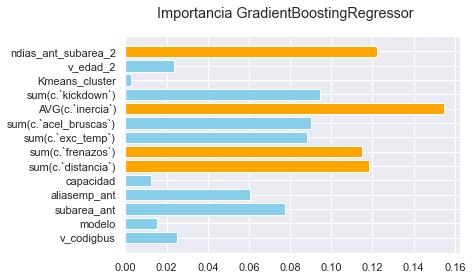

In [539]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score R2=%0.4f" % ran_GB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_GB.best_params_
GB_ran = GradientBoostingRegressor(random_state=0,
                          loss= model['loss'],
                          learning_rate=model['learning_rate'],
                          n_estimators=model['n_estimators'],
                          #subsample=model['subsample'],
                          criterion=model['criterion'],
                          min_samples_split=model['min_samples_split'],
                          min_samples_leaf=model['min_samples_leaf'],
                          max_depth=model['max_depth'],
                          max_features=model['max_features']
                              )






#Predicción
GB_ran.fit(X_train,y_train)
y_pred = GB_ran.predict(X_test)
mae_GB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
#print ('MAE prediction: ', mae_GB)

r2_GB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_GB+'\n')


mse_GB = mean_squared_error(y_pred, y_test)

# R_square
R_square_GB = GB_ran.score(X_test,y_test)
  

print ('Erro medio absoluto (MAE) : ', mae_GB)
print('\nError cuadratico media(MSE) : ',mse_GB)
print('\nR cuadrado :',R_square_GB)
print('\n')


print('\nGradientBoostingRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': GB_ran.feature_importances_})

print('Importancia GradientBoostingRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia GradientBoostingRegressor ')
x=X_test.columns
y=GB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_GB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

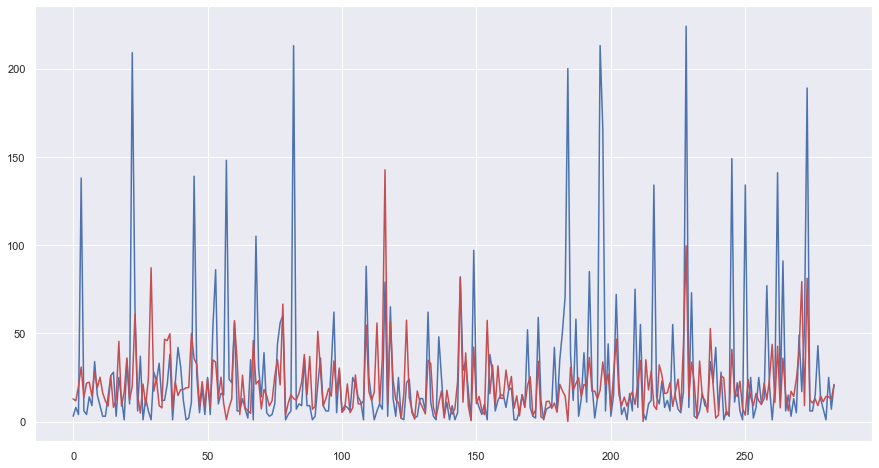

In [540]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_GB.Real)), output_GB.Real, '-b',label='Actual')
ax.plot(range(len(output_GB.Predicho)), output_GB.Predicho, 'r', label='Predicted')
plt.show()

In [542]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'TERMINADO'+'\n')

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


In [543]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch

    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


In [544]:
print(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 

MOTOR
Fecha: 17-2-2022 Hora: 13:48
SCORE
LR 
MAE: 2.1397
MSE: 7.9601
R sqrt: 0.0488

DT 
MAE: 2.1720
MSE: 9.5198
R sqrt: -0.1376

RF 
MAE: 1.7353
MSE: 6.4390
R sqrt: 0.2305

AB 
MAE: 1.7879
MSE: 6.2830
R sqrt: 0.2492

GB 
MAE: 1.8963
MSE: 7.8177
R sqrt: 0.0658


